# Integrated Project №1

We work for the online gaming store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. **The goal is to identify patterns that determine whether a game succeeds or not**. This will allow to spot potential big winners **and help planning advertising campaigns accordingly**.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

**Description of the data**

- `Name`
- `Platform`
- `Year_of_Release`
- `Genre`
- `NA_sales` (North American sales in USD million)
- `EU_sales` (sales in Europe in USD million)
- `JP_sales` (sales in Japan in USD million)
- `Other_sales` (sales in other countries in USD million)
- `Critic_Score` (maximum of 100)
- `User_Score` (maximum of 10)
- `Rating` (ESRB)

Data for 2016 may be incomplete.

##  1. Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1.1) #changing font size
#sns.set_style("whitegrid") #formating style

import sidetable
import matplotlib.pyplot as plt
from scipy import stats as st

# printing more than 1 output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# making possible to display all columns/rows in output
pd.set_option ('display.max_columns', None)

### Loading the data

In [2]:
# Load the data files into different DataFrames
try:    
    df_games = pd.read_csv(r'C:\Users\4from\Desktop\Practicum\5 Integrated Project Module 1\games.csv')
except:
    df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games      

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


## 2. Studding and preparating the data

Since we have several interconnected dataframes it looks reasonable to create a unified approach for checking them. For each dataframe we will study its' concise summary, overview - top rows, descriptive statistics, missing values and duplicates if any. Then we will address our findings.

In [4]:
# Checking the data
print(f'\033[1m\n Concise summary: \033[0m')
df_games.info()
print(f'\033[1m\n Top rows: \033[0m') 
df_games.head(5)
print(f'\033[1m\n Last rows: \033[0m') 
df_games.tail(5)
print(f'\033[1m\n Sample of data: \033[0m') 
df_games.sample(10)

print(f'\033[1m\n Descriptive statistics: \033[0m') 
df_games.describe()
print(f'\033[1m\n Descriptive statistics with categorical parameters: \033[0m') 
df_games.describe(include=['object'])
print(f'\033[1m\n Missing values:\033[0m') 
df_games.stb.missing(style=True)
print(f'\033[1m\n Number of duplicates: \033[0m')
df_games.duplicated().sum()
print(f'\033[1m\n Share of duplicates: {round(df_games.duplicated().mean(), 2)} %\033[0m')
print('-'*26)
print(df_games[df_games.duplicated()].head(10))
print('\n','='*100)
    


 Concise summary: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

 Top rows: 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN



 Last rows: 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN



 Sample of data: 


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4534,Rayman Legends,X360,2013.0,Platform,0.19,0.20,0.00,0.04,90.0,8.2,E10+
16635,Blazer Drive,DS,2008.0,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
5881,Jonas,DS,2009.0,Adventure,0.27,0.00,0.00,0.02,45.0,tbd,E
13184,Corpse Party: Blood Covered - Repeated Fear,PSP,2010.0,Adventure,0.00,0.00,0.05,0.00,NaN,NaN,NaN
3056,TV Show King Party,Wii,2008.0,Puzzle,0.18,0.40,0.00,0.08,NaN,tbd,T
12548,NBA Hangtime,PS,1996.0,Sports,0.03,0.02,0.00,0.00,NaN,NaN,NaN
6968,Scrabble (Others sales),DS,2009.0,Puzzle,0.00,0.23,0.00,0.00,NaN,NaN,NaN
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
911,Mario Super Sluggers,Wii,2008.0,Sports,1.48,0.00,0.29,0.12,69.0,7.8,E
12255,Interactive Storybook DS Series 1,DS,2007.0,Misc,0.06,0.00,0.00,0.00,NaN,tbd,E



 Descriptive statistics: 


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000



 Descriptive statistics with categorical parameters: 


,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990



 Missing values:


,missing,total,percent
Critic_Score,"8,578","16,715",51.32%
Rating,"6,766","16,715",40.48%
User_Score,"6,701","16,715",40.09%
Year_of_Release,269,"16,715",1.61%
Name,2,"16,715",0.01%
Genre,2,"16,715",0.01%
Platform,0,"16,715",0.00%
NA_sales,0,"16,715",0.00%
EU_sales,0,"16,715",0.00%
JP_sales,0,"16,715",0.00%



 Number of duplicates: 


0


 Share of duplicates: 0.0 %
--------------------------
Empty DataFrame
Columns: [Name, Platform, Year_of_Release, Genre, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score, Rating]
Index: []



### Observations:
- data we see matches the Projects' description.
- snake case style of naming was not followed when giving the names of columns - should make them lowercase.
- Year_of_Release - float type - should be changed to integer.
- User_Score - object -  should be changed to float. 
- in several critical fields the percent of missing values is over 40 (Critic_Score - 51%, Rating - 40%, User_Score - 40%). We need to study them carefully. It can be a sign of poor data quality.
- missing values in Year_of_Release - 1,6%. We must address them (e.g. we can ususe common year for other platforms for replacing them).
- two missing values in Name and Genre fields. Most likely they are connected, we'll look into that (most likely dropping them from our dataset wouldn't hurt the data, as their share is insignificant and we can't guess what kind of games they were).
- we see "tbd" values in the User score field. Currently they seem to be a kind of missed values, but it's worh further investigation.
- the range of data (covered period of time) is very broad, we see entries dating back to 1985.
- the number of games is pretty high overall and most of them are unique (from total 16713 entries 11559 are unique).
- no full duplicates revealed.

In [5]:
# Fixing the registers in the names of the columns
df_games.columns = df_games.columns.str.lower() 

In [6]:
# checking data with missed values in year_of_release field
df_games[df_games['year_of_release'].isna()]['name'].value_counts()
df_games[df_games['year_of_release'].isna()]['name'].unique()
df_games[df_games['year_of_release'].isna()].sample(10)

name
LEGO Harry Potter: Years 5-7    7
Happy Feet Two                  4
Rock Band                       4
Test Drive Unlimited 2          3
Bejeweled 3                     3
                               ..
Jet X20                         1
Tony Hawk's Downhill Jam        1
Tribes: Aerial Assault          1
Big Beach Sports 2              1
Hakuouki: Shinsengumi Kitan     1
Name: count, Length: 232, dtype: int64

array(['Madden NFL 2004', 'FIFA Soccer 2004',
       'LEGO Batman: The Videogame', 'wwe Smackdown vs. Raw 2006',
       'Space Invaders', 'Rock Band',
       "Frogger's Adventures: Temple of the Frog",
       'LEGO Indiana Jones: The Original Adventures', 'Call of Duty 3',
       'Call of Duty: Black Ops', 'Triple Play 99', 'Adventure', 'Combat',
       'LEGO Harry Potter: Years 5-7', 'NASCAR Thunder 2003',
       'Hitman 2: Silent Assassin', 'Legacy of Kain: Soul Reaver',
       'Donkey Kong Land III', 'Air-Sea Battle', 'Suikoden III',
       'Wheel of Fortune', 'Yakuza 4', 'Namco Museum', 'Rhythm Heaven',
       'The Lord of the Rings: War in the North', 'Madden NFL 07',
       'MLB SlugFest 20-03', 'Shaun White Snowboarding',
       'PES 2009: Pro Evolution Soccer', 'WarioWare: Twisted!',
       'Madden NFL 11', 'Test Drive Unlimited 2',
       'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe',
       'Monster Hunter 2', 'Metal Gear Solid 2: Substance',
       'Advanc

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5642,Dragster,2600,NaN,Racing,0.30,0.02,0.00,0.00,NaN,NaN,NaN
1131,Call of Duty: Black Ops,PC,NaN,Shooter,0.58,0.81,0.00,0.23,81.0,5.2,M
5041,Hangman,2600,NaN,Puzzle,0.35,0.02,0.00,0.00,NaN,NaN,NaN
6861,Singularity,PS3,NaN,Shooter,0.17,0.04,0.01,0.03,77.0,7.7,M
2010,Donkey Kong Land III,GB,NaN,Platform,0.68,0.31,0.00,0.04,NaN,NaN,NaN
16157,Aquaman: Battle for Atlantis,XB,NaN,Action,0.01,0.00,0.00,0.00,26.0,2.7,T
4945,Robert Ludlum's The Bourne Conspiracy,PS3,NaN,Action,0.18,0.14,0.00,0.06,70.0,7.6,T
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
7724,Dead Space 3,PC,NaN,Action,0.02,0.16,0.00,0.02,78.0,6,M


We see 232 games with 269 missed values in the `year_of_release` field.

In [7]:
# let's check whether it would be possible to replace these missing values

games_with_missed_years = df_games[df_games['year_of_release'].isna()]['name'].unique()

n = 0 # counter for entries with one value of `year_of_release` field except NaN 

# list of names of games that have entries with missed values in `year_of_release` field
for game in games_with_missed_years: 
    
    # unique values of `year_of_release` except NaN 
    print(df_games.query('name == @game and year_of_release != "NaN"')['year_of_release'].unique())
    
    # counting entries with one value of year of release field except NaN 
    if len(df_games.query('name == @game and year_of_release != "NaN"')['year_of_release'].unique()) == 1:  
         n += 1  
        
print('\nNumber of entries that have one value of year of release field except NaN:', n)
print('% of the whole dataframe:', n/len(df_games)*100) # %of the whole dataframe 

[  nan 2003.]
[  nan 2003.]
[2008.   nan]
[nan]
[  nan 1994. 1999. 2002.]
[nan]
[nan]
[2008.   nan]
[2006.   nan]
[2010.   nan]
[nan]
[nan]
[nan]
[  nan 2012.]
[  nan 2002.]
[2002.   nan 2003.]
[nan]
[nan]
[nan]
[nan]
[1998. 2010.   nan 1997.]
[nan]
[2001.   nan 2002.]
[2008.   nan]
[  nan 2011.]
[2006.   nan]
[  nan 2002.]
[  nan 2008.]
[2008.   nan 2009.]
[nan]
[2010.   nan]
[nan]
[  nan 2005.]
[nan]
[  nan 2002.]
[nan]
[2007.   nan]
[2005.   nan]
[  nan 2002.]
[2001.   nan]
[2004.   nan]
[2003.   nan]
[nan]
[2009.   nan]
[1991. 2006.   nan]
[nan]
[2006.   nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[nan]
[2002.   nan]
[nan]
[nan]
[  nan 2011.]
[2013. 2014.   nan]
[  nan 2010.]
[2004.   nan]
[  nan 2006.]
[  nan 2010.]
[nan]
[nan]
[  nan 2002.]
[nan]
[nan]
[2010.   nan]
[2007.   nan]
[2006.   nan]
[nan]
[nan]
[2001.   nan]
[nan]
[nan]
[nan]
[nan]
[2005.   nan]
[2008.   nan]
[  nan 2006. 2005.]
[2011.   nan]
[  nan 2006.]
[2010.   nan]
[2013.   nan]
[nan]
[  nan 2

There are less than 1% of missed values that we can replace with a high level of trust. Let's do what we can. 

In [8]:
# dataframe of games and years of releases based on  the list of games having missed values       
df_games.query('name in @games_with_missed_years & year_of_release !="Nan"')[['name','year_of_release']]

,name,year_of_release
32,Call of Duty: Black Ops,2010.0
41,Call of Duty: Black Ops,2010.0
183,Madden NFL 2004,NaN
213,Madden NFL 06,2005.0
241,Madden NFL 07,2006.0
...,...,...
16442,Dinotopia: The Sunstone Odyssey,2003.0
16448,Inversion,NaN
16458,Hakuouki: Shinsengumi Kitan,NaN
16522,Virtua Quest,NaN


In [9]:
# the same data as above but grouped by name field
df_games_with_missed_years = df_games.query('name in @games_with_missed_years & year_of_release !="Nan"')[['name','year_of_release']].\
                                    groupby('name')['year_of_release'].sum()
df_games_with_missed_years

name
AKB1/48: Idol to Guam de Koishitara...        2011.0
Action Man-Operation Extreme                     0.0
Advance Wars: Days of Ruin                       0.0
Adventure                                        0.0
Agarest Senki: Re-appearance                     0.0
                                               ...  
Yu Yu Hakusho: Dark Tournament                   0.0
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)       0.0
Zero: Tsukihami no Kamen                         0.0
eJay Clubworld                                   0.0
wwe Smackdown vs. Raw 2006                       0.0
Name: year_of_release, Length: 232, dtype: float64

In [10]:
# leaving only entries with one value of year of release field except NaN  
df_games_with_missed_years = df_games_with_missed_years.loc[lambda x: (x>1970) & (x<2017)]
df_games_with_missed_years

name
AKB1/48: Idol to Guam de Koishitara...           2011.0
Aquaman: Battle for Atlantis                     2003.0
Battle vs. Chess                                 2011.0
Bejeweled 3                                      2010.0
Brothers in Arms: Furious 4                      2012.0
Cabela's Alaskan Adventure                       2006.0
Custom Robo                                      2004.0
Dance! It's Your Stage                           2011.0
Danganronpa: Trigger Happy Havoc                 2013.0
Dinotopia: The Sunstone Odyssey                  2003.0
Disney's Chicken Little: Ace In Action           2006.0
Final Fantasy XI                                 2006.0
Godzilla: Destroy All Monsters Melee             2002.0
Happy Feet Two                                   2011.0
Harvest Moon: The Tale of Two Towns              2010.0
James Cameron's Dark Angel                       2002.0
LEGO Harry Potter: Years 5-7                     2012.0
Luxor: Pharaoh's Challenge                 

In [11]:
# pass the series to the dictionary
df_games_with_missed_years_dict=pd.Series(df_games_with_missed_years ).to_dict()
df_games_with_missed_years_dict

{'AKB1/48: Idol to Guam de Koishitara...': 2011.0,
 'Aquaman: Battle for Atlantis': 2003.0,
 'Battle vs. Chess': 2011.0,
 'Bejeweled 3': 2010.0,
 'Brothers in Arms: Furious 4': 2012.0,
 "Cabela's Alaskan Adventure": 2006.0,
 'Custom Robo': 2004.0,
 "Dance! It's Your Stage": 2011.0,
 'Danganronpa: Trigger Happy Havoc': 2013.0,
 'Dinotopia: The Sunstone Odyssey': 2003.0,
 "Disney's Chicken Little: Ace In Action": 2006.0,
 'Final Fantasy XI': 2006.0,
 'Godzilla: Destroy All Monsters Melee': 2002.0,
 'Happy Feet Two': 2011.0,
 'Harvest Moon: The Tale of Two Towns': 2010.0,
 "James Cameron's Dark Angel": 2002.0,
 'LEGO Harry Potter: Years 5-7': 2012.0,
 "Luxor: Pharaoh's Challenge": 2007.0,
 'Majesty 2: The Fantasy Kingdom Sim': 2009.0,
 'Mega Man X Collection': 2006.0,
 'Metal Gear Solid 2: Substance': 2002.0,
 'Monster Hunter Frontier Online': 2010.0,
 'NASCAR: Dirt to Daytona': 2002.0,
 'NBA Live 2003': 2002.0,
 'NBA Starting Five': 2002.0,
 'Nicktoons: Battle for Volcano Island': 2006.0

In [12]:
# Now we will replace the missing values in years_of_release field column by using fillna() and map() with the dictionary we've creaed.
df_games['year_of_release']=df_games['year_of_release'].fillna(df_games['name'].map(df_games_with_missed_years_dict))

# checking the result
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16511 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Less than 100 missed values were replaced and it's better than nothing. Now we can get rid of the remaining rows with missing values in the`year_of_release` field.

In [13]:
# getting rid of missed values in year_of_release field
df_games = df_games.dropna(subset=['year_of_release'])

# checking the result
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16511 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16509 non-null  object 
 1   platform         16511 non-null  object 
 2   year_of_release  16511 non-null  float64
 3   genre            16509 non-null  object 
 4   na_sales         16511 non-null  float64
 5   eu_sales         16511 non-null  float64
 6   jp_sales         16511 non-null  float64
 7   other_sales      16511 non-null  float64
 8   critic_score     8025 non-null   float64
 9   user_score       9884 non-null   object 
 10  rating           9816 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [14]:
# let's fix data type of the year_of_release field
df_games.loc[:, 'year_of_release'] = df_games['year_of_release'].astype('int')

# checking the results
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16511 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16509 non-null  object 
 1   platform         16511 non-null  object 
 2   year_of_release  16511 non-null  float64
 3   genre            16509 non-null  object 
 4   na_sales         16511 non-null  float64
 5   eu_sales         16511 non-null  float64
 6   jp_sales         16511 non-null  float64
 7   other_sales      16511 non-null  float64
 8   critic_score     8025 non-null   float64
 9   user_score       9884 non-null   object 
 10  rating           9816 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


All is fine now, the data types are as wanted.

In [15]:
# let's check missed values in the name and genre fields. We hypothesized that they are interconnected. 
df_games[df_games['name'].isna() & df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [16]:
# yes, these missing values are interconnected. Since there is no way to guess what name and genre this data is on - we will drop it.
df_games = df_games.dropna(subset=['name'])

# checking the result
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16509 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16509 non-null  object 
 1   platform         16509 non-null  object 
 2   year_of_release  16509 non-null  float64
 3   genre            16509 non-null  object 
 4   na_sales         16509 non-null  float64
 5   eu_sales         16509 non-null  float64
 6   jp_sales         16509 non-null  float64
 7   other_sales      16509 non-null  float64
 8   critic_score     8025 non-null   float64
 9   user_score       9884 non-null   object 
 10  rating           9816 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [17]:
# let's check 'tbd' value in user_score score field.
df_games[df_games['user_score']=='tbd']
df_games[df_games['user_score']=='tbd']['year_of_release'].value_counts(sort=False) # checking destribution of 'tbd' values by years
len(df_games[df_games['user_score']=='tbd'])/len(df_games)*100 # %of the whole dataframe 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


year_of_release
2010.0    332
2005.0    121
2011.0    218
2009.0    405
2004.0    107
1999.0      8
2001.0     82
2008.0    327
2007.0    193
2003.0     96
2000.0     43
2006.0    125
2002.0    193
2015.0     38
2014.0     21
2012.0     26
2013.0     15
2016.0     34
1997.0      1
Name: count, dtype: int64

14.44666545520625

- we see a significant piece of data - almost 15%  with 'tbd' value in user_score field. 
- these values appear in different years, so we can't say that it's a problem just for some short period. 
- in the frames of the current project, it doesn't seem possible to gather true values that must be put instead of 'tbd' (if they actually do exist).
- as in fact these 'tbd' values mean 'to be determined' and we can't determine them - the best we can do - treat these 'tbd' values as missed ones. 

In [18]:
# replacing 'tbd' values by np.nan (a special floating-point value that stands for "Not a Number", 
# it seems to be the best placeholder for undefined value in our case)
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

# checking the result
df_games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


All is fine, no "tbd" value anymore.

In [19]:
# let's fix data type of user_score field
df_games['user_score'] = df_games['user_score'].astype('float')

# checking the result
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16509 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16509 non-null  object 
 1   platform         16509 non-null  object 
 2   year_of_release  16509 non-null  float64
 3   genre            16509 non-null  object 
 4   na_sales         16509 non-null  float64
 5   eu_sales         16509 non-null  float64
 6   jp_sales         16509 non-null  float64
 7   other_sales      16509 non-null  float64
 8   critic_score     8025 non-null   float64
 9   user_score       7499 non-null   float64
 10  rating           9816 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [20]:
# let's study unique values of fields with missed values and their distributions by years
df_games['critic_score'].unique()
df_games['user_score'].unique()
df_games['rating'].unique()

df_games[df_games['critic_score'].isna()]['year_of_release'].value_counts(sort=False)
df_games[df_games['user_score'].isna()]['year_of_release'].value_counts(sort=False)
df_games[df_games['rating'].isna()]['year_of_release'].value_counts(sort=False)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

year_of_release
1985.0     13
1996.0    255
1989.0     17
1984.0     14
2005.0    284
1999.0    300
1990.0     16
2006.0    388
1988.0     14
2002.0    202
2010.0    758
1998.0    351
2015.0    381
2013.0    272
2009.0    776
2014.0    320
1992.0     42
1993.0     60
2004.0    202
1994.0    120
1997.0    272
2012.0    334
2007.0    506
1982.0     36
2016.0    270
2003.0    191
2011.0    644
1986.0     21
2000.0    207
2001.0    156
1995.0    219
2008.0    714
1991.0     41
1981.0     46
1987.0     16
1980.0      9
1983.0     17
Name: count, dtype: int64

year_of_release
1985.0     13
1996.0    255
1989.0     17
1984.0     14
2005.0    357
1999.0    308
1990.0     16
2006.0    456
1988.0     14
2002.0    366
2010.0    792
1998.0    348
2015.0    309
2013.0    241
2009.0    814
2014.0    252
1992.0     42
1993.0     60
2004.0    274
1994.0    120
1997.0    271
2012.0    317
2007.0    569
1982.0     36
2016.0    240
2003.0    261
2011.0    642
1986.0     21
2000.0    243
2001.0    225
1995.0    219
2008.0    769
1991.0     41
1981.0     46
1987.0     16
1980.0      9
1983.0     17
Name: count, dtype: int64

year_of_release
1985.0     13
1996.0    256
1989.0     17
1984.0     14
2005.0    234
1999.0    297
1990.0     16
2006.0    329
1988.0     14
2002.0    174
2010.0    459
1998.0    347
2015.0    291
2013.0    229
2009.0    416
2014.0    236
1992.0     41
1993.0     60
2004.0    165
1994.0    120
1997.0    270
2012.0    298
2007.0    376
1982.0     36
2016.0    222
2003.0    162
2011.0    439
1986.0     21
2000.0    202
2001.0    143
1995.0    219
2008.0    448
1991.0     41
1981.0     46
1987.0     16
1980.0      9
1983.0     17
Name: count, dtype: int64

- these missed values appear in different years, so we can't conclude that it's a problem just during a short period. 
- without more sources of data, it seems impossible to assemble the true values that must replace the missing ones.
- we may be able to find some patterns, replace missing values with some averages. However, we would only ruin the quality of the data since these scores and ratings are undoubtedly the result of many different factors.
- the share of data based on missed values is crucial, we can't just drop it (thus we most likely will lose many inside and can make wrong assumptions.
- it seems the most appropriate solution is neither to drop the data nor to replace it with some fictitious data - leave the missing values as they are. We will just change 'NaN' values in the rating field to 'unknown', thus we will be able to treat all values as of the object type.

In [21]:
# filling missed values in rating field to 'unknown'
df_games['rating'] = df_games['rating'].fillna(value='unknown')

# checking the result
df_games['rating']

0              E
1        unknown
2              E
3              E
4        unknown
          ...   
16710    unknown
16711    unknown
16712    unknown
16713    unknown
16714    unknown
Name: rating, Length: 16509, dtype: object

**Studying issues in the categorical fields**

By issues we mean duplicates. Just in case, let's check the unique values of all the categorical characteristics to see whether they consist of unobvious duplicates where should be none. We'll take action only if we find issues in the fields important for our studies. By the way by use of Pandas duplicated() method we will check whether there are duplicated names, whether there should be non, e.g. in the platform field (duplicates there would be crucial).

In [22]:
# let's sort the names of object type field to help check if there are any unobvious duplicates 
for characteristic in df_games: # going through all column names
    if df_games[characteristic].dtype=='object': #  if a column type is 'object'
        print(f'Unique values of the {characteristic} field') 
        sorted(df_games[characteristic].unique())
        print('------------------------\n')

Unique values of the name field


[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

------------------------

Unique values of the platform field


['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

------------------------

Unique values of the genre field


['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

------------------------

Unique values of the rating field


['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'unknown']

------------------------



For the current study the most important fields for us are: platform, genre, rating. Everything is fine with the values there (we could use the lemmatization approaches for best possible checking for duplicates, but with the output given above seems we can get the job done well and fast without that in manual mode).

**Enriching data**

In [23]:
# Since later on we are going to analyze the data on sales it would be handy to make a separate total sales field.
df_games['total_sales']=df_games[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

# checking the result
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7343,TRON: Evolution - Battle Grids,Wii,2010.0,Racing,0.17,0.02,0.00,0.01,NaN,NaN,unknown,0.20
884,The Sims 3,PS3,2010.0,Simulation,0.73,0.89,0.02,0.30,78.0,6.4,T,1.94
11266,Monster Jam: Urban Assault,PSP,2008.0,Racing,0.08,0.00,0.00,0.01,NaN,NaN,E,0.09
14722,Puzzle Challenge: Crosswords and More!,Wii,2009.0,Puzzle,0.03,0.00,0.00,0.00,NaN,NaN,unknown,0.03
9661,Capcom vs. SNK 2: Millionaire Fighting 2001,DC,2001.0,Fighting,0.00,0.00,0.12,0.00,NaN,NaN,unknown,0.12


All is fine with the new field, as we wanted.

### Summary on data preparation

What we've done so far:

- made all the column names in "snake_case" style

- fixed the data types, where needed (in the  year_of_release field from float type to integer, in the user_score field from object - to float).

- investigated several critical fields where percent of missing values was over 40 (critic_score - 51%, rating - 40%, user_score - 40%). 

    We studied the unique values of these fields with missing values and their distributions by years. The missed values occur in different years. Since these scores and ratings are undoubtedly the result of many different factors, we could only ruin the quality of the data trying to replace them somehow by guessing possible patterns and substitutes, without having other reliable sources of data. 

    As these missed values represented the significant piece of data we decided not to drop the rows where they were present. So the decision we made was to leave the missing values as they were. Just changed the missing values in the rating field to 'unknown'. 

- there were missing values in year_of_release - 1,6% of total data. We found out that approximately 1/3 of them could be replaced by relevant data available in our dataset (we found entries of these games with missed years of release, that also had only one value of year of release field except NaN; created the dictionary of the relevant games and years of releases; filled the missing values by use of fillna() method and map() function).

    So we filled missed values where possible and dropped data with what was left. 

- there were two missing values in the name and genre fields. We checked that they were interconnected. There was no way to guess what name and genre these data were on - so we dropped them.

    In the user_score field, we saw almost 15% of data with 'tbd' value. We checked that these values appear in different years, so we can't say that it's a problem for only a short period. As in fact these 'tbd' values mean 'to be determined' and we can't determine them - the best solution we found was treating these 'tbd' values as missing ones. It seemed impossible to guess the relevant values that must be put instead of 'tbd'. So we changed them from 'tbd' to np.nan.

- we checked both full duplicates and unobvious duplicates (e.g. due to misprints) in crucial fields (like platform, genre) - no issues were revealed.

- we enriched the data for further analysis by adding the total_sales field where we can see revenue from all regions.

## 3. Analyzing the data

Now, as the data is clean, let's analyze it and answer the projects' questions.

Let's outline the questions we are going to answer in this part of the project, they are following:
- Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. 
- Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various -platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

#### Look at how many games were released in different years. Is the data for every period significant?

In [24]:
# finding number of all unique values in the year_of_release field by year
df_games_by_year = df_games[['year_of_release','name']].groupby(['year_of_release'])['name'].nunique().reset_index()
df_games_by_year.columns = ['year_of_release', 'games_quantity']
df_games_by_year

,year_of_release,games_quantity
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


In [25]:
# dataframe sorted by quantity of games 
df_games_by_year_sorted = df_games_by_year.sort_values(by='games_quantity', ascending = False)
df_games_by_year_sorted

,year_of_release,games_quantity
28,2008.0,1039
29,2009.0,1001
30,2010.0,900
27,2007.0,884
31,2011.0,779
26,2006.0,773
25,2005.0,657
22,2002.0,631
24,2004.0,550
23,2003.0,546


C:\Users\4from\anaconda3\lib\site-packages\matplotlib\text.py:757: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(self._x))
C:\Users\4from\anaconda3\lib\site-packages\matplotlib\text.py:897: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


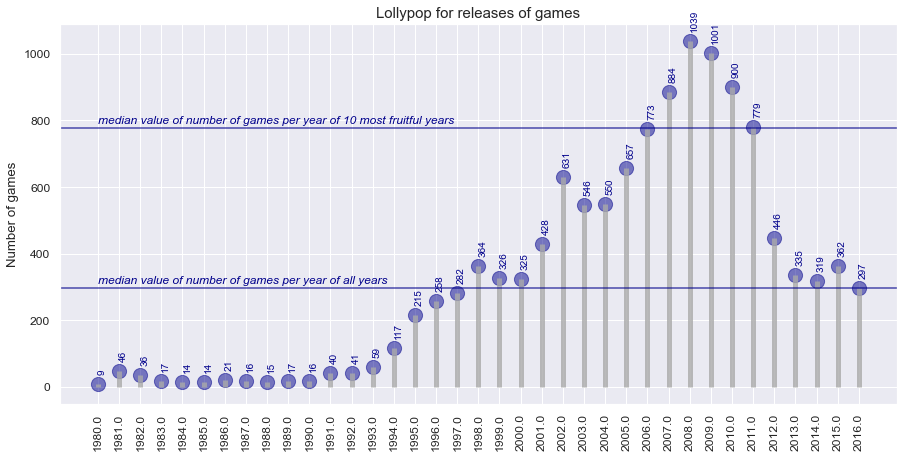

In [26]:
# lollypop chart seems to be a good choice to display the data we study, let's build it
fig,ax=plt.subplots(figsize=(15,7))
_ =ax.vlines(x=df_games_by_year['year_of_release'], ymin=0, ymax=df_games_by_year['games_quantity'], color='darkgrey', alpha=0.8, linewidth=5)
_ =ax.scatter(x=df_games_by_year['year_of_release'],y=df_games_by_year['games_quantity'], s=200, color='darkblue',alpha=0.5);

_ =ax.set_title("Lollypop for releases of games", fontdict={'size':15})
_ =ax.set_ylabel('Number of games')
_ =ax.set_xticks(df_games_by_year['year_of_release'])
_ =ax.set_xticklabels(df_games_by_year['year_of_release'],rotation=90)

_ =ax.axhline(y=df_games_by_year['games_quantity'].median(), color='darkblue', alpha=0.7) # median value of number of games per year of all years
_ =ax.text(x=df_games_by_year['year_of_release'].head(1), y=df_games_by_year['games_quantity'].median()+15,\
           s='median value of number of games per year of all years', color='darkblue', style ='italic', size=12)

_ =ax.axhline(y=df_games_by_year_sorted['games_quantity'].head(10).median(), color='darkblue', alpha=0.7) # median value of number of games per year of 10 most fruitful years
_ =ax.text(x=df_games_by_year['year_of_release'].head(1), y=df_games_by_year_sorted['games_quantity'].head(10).median()+15,\
           s='median value of number of games per year of 10 most fruitful years', color='darkblue', style ='italic', size=12)

for row in df_games_by_year.itertuples():
    _ =ax.text(row.year_of_release, row.games_quantity+35, s=row.games_quantity, color='darkblue', rotation=90);

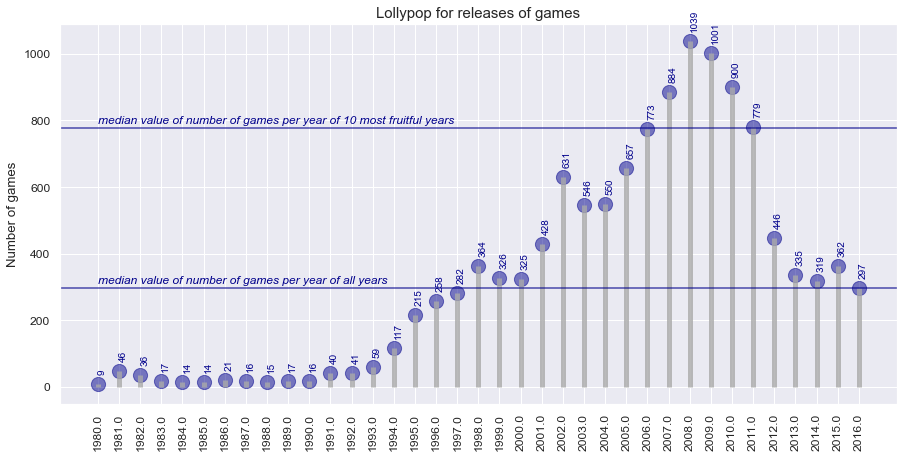

In [27]:
# lollypop chart seems to be a good choice to display the data we study, let's build it
fig, ax = plt.subplots(figsize=(15, 7))
_ = ax.vlines(x=df_games_by_year['year_of_release'], ymin=0, ymax=df_games_by_year['games_quantity'], color='darkgrey', alpha=0.8, linewidth=5)
_ = ax.scatter(x=df_games_by_year['year_of_release'], y=df_games_by_year['games_quantity'], s=200, color='darkblue', alpha=0.5)

_ = ax.set_title("Lollypop for releases of games", fontdict={'size': 15})
_ = ax.set_ylabel('Number of games')
_ = ax.set_xticks(df_games_by_year['year_of_release'])
_ = ax.set_xticklabels(df_games_by_year['year_of_release'], rotation=90)

_ = ax.axhline(y=df_games_by_year['games_quantity'].median(), color='darkblue', alpha=0.7) # median value of number of games per year of all years
_ = ax.text(x=df_games_by_year['year_of_release'].head(1), y=df_games_by_year['games_quantity'].median() + 15, \
           s='median value of number of games per year of all years', color='darkblue', style='italic', size=12)

_ = ax.axhline(y=df_games_by_year_sorted['games_quantity'].head(10).median(), color='darkblue', alpha=0.7) # median value of number of games per year of 10 most fruitful years
_ = ax.text(x=df_games_by_year['year_of_release'].head(1), y=df_games_by_year_sorted['games_quantity'].head(10).median() + 15, \
           s='median value of number of games per year of 10 most fruitful years', color='darkblue', style='italic', size=12)

for row in df_games_by_year.itertuples():
    _ = ax.text(row.year_of_release, row.games_quantity + 35, s=row.games_quantity, color='darkblue', rotation=90)


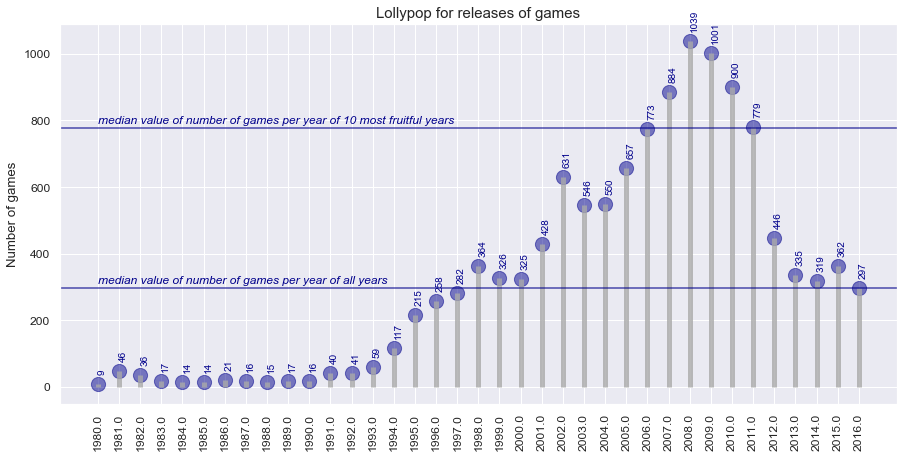

In [28]:
# lollypop chart seems to be a good choice to display the data we study, let's build it
fig, ax = plt.subplots(figsize=(15, 7))
_ = ax.vlines(x=df_games_by_year['year_of_release'], ymin=0, ymax=df_games_by_year['games_quantity'], color='darkgrey', alpha=0.8, linewidth=5)
_ = ax.scatter(x=df_games_by_year['year_of_release'], y=df_games_by_year['games_quantity'], s=200, color='darkblue', alpha=0.5)

_ = ax.set_title("Lollypop for releases of games", fontdict={'size': 15})
_ = ax.set_ylabel('Number of games')
_ = ax.set_xticks(df_games_by_year['year_of_release'])
_ = ax.set_xticklabels(df_games_by_year['year_of_release'], rotation=90)

_ = ax.axhline(y=df_games_by_year['games_quantity'].median(), color='darkblue', alpha=0.7) # median value of number of games per year of all years
_ = ax.text(x=df_games_by_year['year_of_release'].head(1), y=df_games_by_year['games_quantity'].median() + 15, \
           s='median value of number of games per year of all years', color='darkblue', style='italic', size=12)

_ = ax.axhline(y=df_games_by_year_sorted['games_quantity'].head(10).median(), color='darkblue', alpha=0.7) # median value of number of games per year of 10 most fruitful years
_ = ax.text(x=df_games_by_year['year_of_release'].head(1), y=df_games_by_year_sorted['games_quantity'].head(10).median() + 15, \
           s='median value of number of games per year of 10 most fruitful years', color='darkblue', style='italic', size=12)

for row in df_games_by_year.itertuples():
    _ = ax.text(row.year_of_release, row.games_quantity + 35, s=row.games_quantity, color='darkblue', rotation=90)


- we cannot be sure that those games that were specified in those years actually were released at those years, maybe they were just selling those years.
- until middle 90th there is not much data to make conclusions on. Probably there were really not many games released at those times or data gathering was of poor quality. **The poorest quality of data seems to be until 1995-1997 years, so we can treat the data untill this years as insignificant.**
- we see the start of games booming since 2001 year with peak of development industry in 2008-2009 years. There was some decline after 2011 year which slowed down in 2015 year.

#### Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year.

In [29]:
# sorting platforms by their frequency
df_games.stb.freq(['platform'], thresh=100,style=True, cum_cols=True)

,platform,count,percent,cumulative_count,cumulative_percent
0,PS2,"2,134",12.93%,"2,134",12.93%
1,DS,"2,126",12.88%,"4,260",25.80%
2,PS3,"1,317",7.98%,"5,577",33.78%
3,Wii,"1,293",7.83%,"6,870",41.61%
4,X360,"1,245",7.54%,"8,115",49.16%
5,PSP,"1,196",7.24%,"9,311",56.40%
6,PS,"1,190",7.21%,"10,501",63.61%
7,PC,961,5.82%,"11,462",69.43%
8,GBA,811,4.91%,"12,273",74.34%
9,XB,810,4.91%,"13,083",79.25%


We see that PS2 and DS are the top two most popular platforms, over 25% of all entries are on them.

In [30]:
# sales of top 10 platforms
df_games.pivot_table(index='platform',values=['total_sales','na_sales','eu_sales','jp_sales'],\
                                         aggfunc=('sum')).sort_values(by='total_sales',ascending=False).nlargest(10,['total_sales'])

,eu_sales,jp_sales,na_sales,total_sales
platform,,,,
PS2,333.19,137.69,573.64,1235.16
X360,269.47,12.32,597.83,964.82
PS3,328.30,79.52,391.35,934.19
Wii,258.78,69.05,488.04,893.75
DS,188.71,175.02,381.03,803.90
PS,212.39,139.78,334.72,727.58
PS4,141.09,15.96,108.74,314.14
GBA,74.59,46.56,184.12,312.88
PSP,65.72,76.12,107.38,290.04


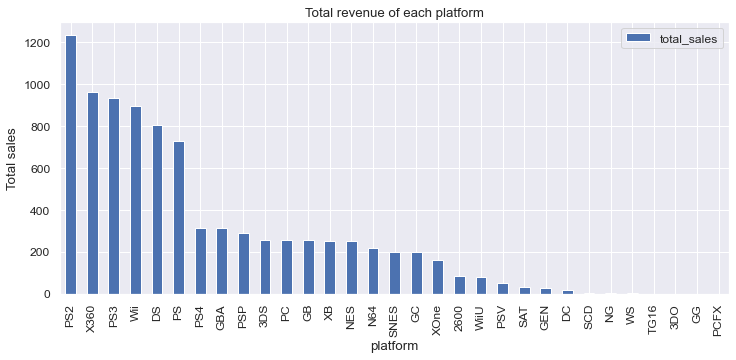

In [31]:
# let's plot a bar chart on revenues from each platform
df_games.pivot_table(index='platform',values=['total_sales'],aggfunc=('sum')).sort_values(by='total_sales',ascending=False).plot(kind='bar', figsize=(12,5))
plt.title('Total revenue of each platform')
plt.ylabel('Total sales');

In [32]:
# building data frame on total sales by platform for further visualization
df_total_sales_by_platform = df_games.pivot_table(index='platform',values=['total_sales'],aggfunc=('sum')).sort_values(by='total_sales',ascending=True).reset_index()
df_total_sales_by_platform

,platform,total_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


In [33]:
# creating an auxiliary sales_comparison field for further visualization*
df_total_sales_by_platform['sales_comparison']= (df_total_sales_by_platform['total_sales']-df_total_sales_by_platform['total_sales'].mean())\
    /df_total_sales_by_platform['total_sales'].std()

\* here we would use so called z-score approach showing the number of standard deviations by which the value is above or below the mean value of the distribution (total sales of platforms in our case). Values above the mean have positive standard scores, while those below the mean have negative standard scores.

In [34]:
# checking an auxiliary sales_comparison field 
df_total_sales_by_platform

,platform,total_sales,sales_comparison
0,PCFX,0.03,-0.826288
1,GG,0.04,-0.826259
2,3DO,0.10,-0.826085
3,TG16,0.16,-0.825911
4,WS,1.42,-0.822255
5,NG,1.44,-0.822197
6,SCD,1.86,-0.820979
7,DC,15.95,-0.780103
8,GEN,28.35,-0.744131
9,SAT,33.59,-0.728929


In [35]:
# creating an auxiliary color field for further visualization
df_total_sales_by_platform['color']=['red' if x<0 else 'green' for x in df_total_sales_by_platform['sales_comparison']]
df_total_sales_by_platform

,platform,total_sales,sales_comparison,color
0,PCFX,0.03,-0.826288,red
1,GG,0.04,-0.826259,red
2,3DO,0.10,-0.826085,red
3,TG16,0.16,-0.825911,red
4,WS,1.42,-0.822255,red
5,NG,1.44,-0.822197,red
6,SCD,1.86,-0.820979,red
7,DC,15.95,-0.780103,red
8,GEN,28.35,-0.744131,red
9,SAT,33.59,-0.728929,red


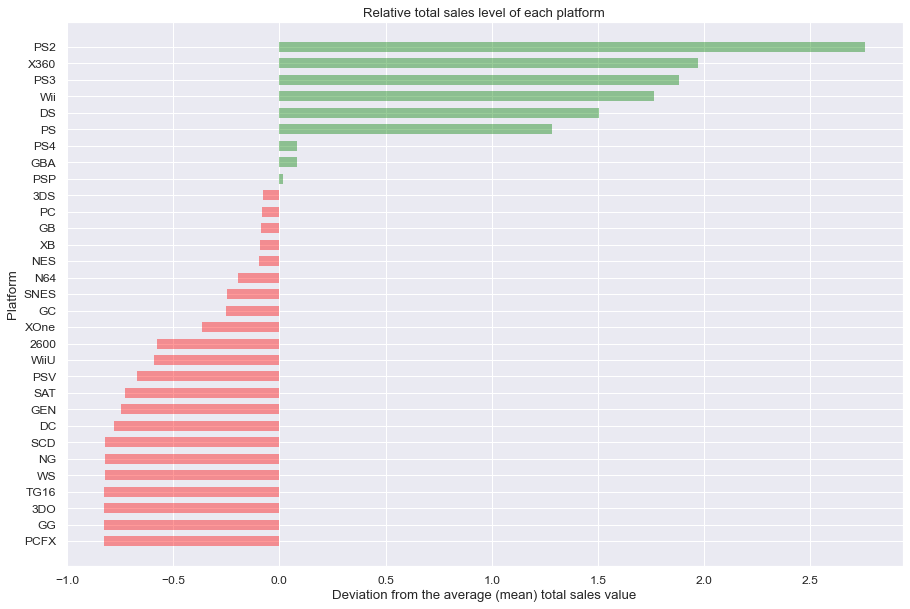

In [36]:
# let's visualize our data
plt.figure(figsize=(15,10))
plt.hlines(y=df_total_sales_by_platform['platform'],xmax=df_total_sales_by_platform['sales_comparison'], xmin=0,color=df_total_sales_by_platform['color'], alpha=0.4, linewidth=10)
plt.title('Relative total sales level of each platform')
plt.xlabel('Deviation from the average (mean) total sales value')
plt.ylabel('Platform');

- we see that the the higest revenues have PS2, X360, PS3, Wii, DS and PS platforms.
- PS2 is the most popular platform with the highest revenues, meanwhile, DS being the second most popular platform, is just in the 5th place in revenues rank.
- only 9 platforms out of 31 have total sales above average, 6 from them are avident top performers. PS2 is the absolute leader having total sales level laying higer in more than 2.5 standard deviations from the mean of all platforms.

In [37]:
# creating a list of top 6 top plaforms (with )
list_top_sales_platforms = df_games.pivot_table(index='platform',values=['total_sales'],aggfunc=('sum')).sort_values(by='total_sales',ascending=False).reset_index()['platform'].head(6)
list_top_sales_platforms

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
Name: platform, dtype: object

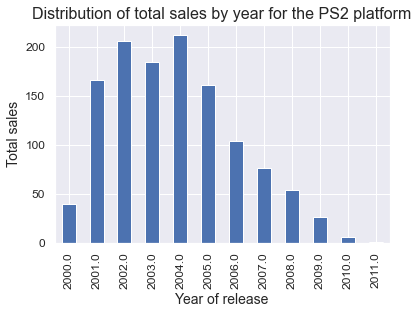

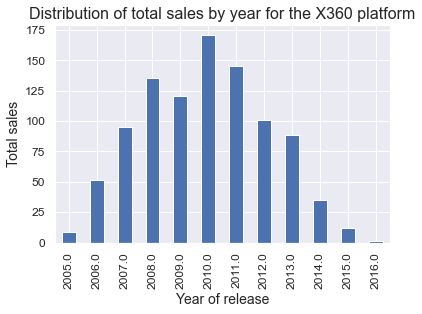

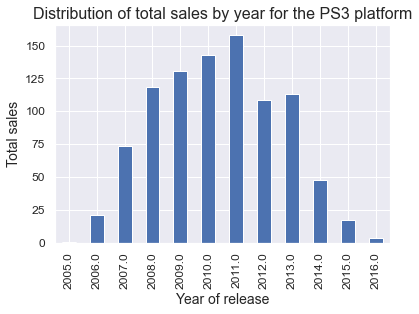

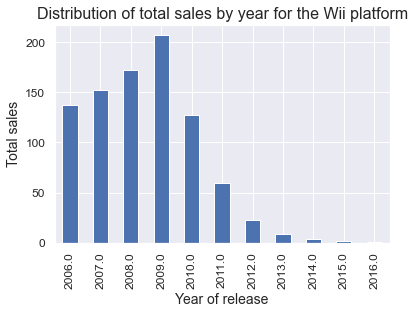

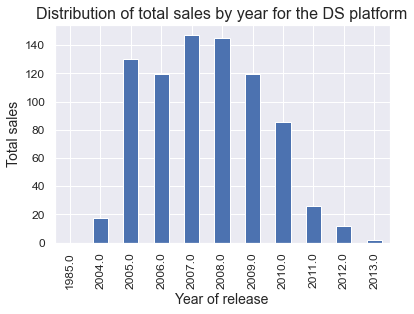

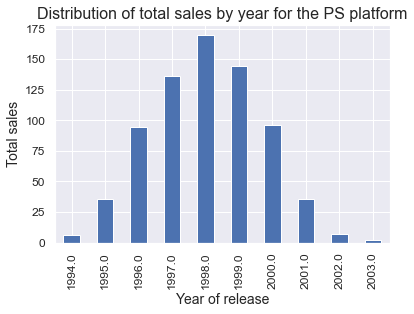

In [38]:
# building bar charts for distributions based on data for each year for 6 top plaforms
for top_platform in list_top_sales_platforms:
    _ =df_games.query('platform == @top_platform').groupby('year_of_release')['total_sales'].sum().plot(kind='bar', grid=True, fontsize=12)
    _ =plt.xlabel('Year of release', size =14)
    _ =plt.ylabel('Total sales', size =14)
    _ =plt.title(f'Distribution of total sales by year for the {top_platform} platform', size =16)
    _ =plt.show()
    print(); 

- we see that no platform had relatively same level of revenue for its whole life cycle. 
- each of them had a clear picture of the life cycle reflected in sales. 
- platforms were popular mostly in different periods of time.

#### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

In [39]:
# platforms that used to be popular but now have zero sales. 
# total sales above average and last year of release of any game was in 2015 year or earlier
# df_total_sales_by_platform - platforms in "green zone"

In [40]:
list_popular_platforms = df_total_sales_by_platform.query('color == "green"')['platform'].to_list()
list_popular_platforms

['PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']

In [41]:
df_max_age = df_games.groupby(['platform'])['year_of_release'].agg(['min','max']).sort_values(by='max')
df_max_age 

,min,max
platform,,
2600,1980.0,1989.0
GG,1992.0,1992.0
SCD,1993.0,1994.0
GEN,1990.0,1994.0
NES,1983.0,1994.0
3DO,1994.0,1995.0
TG16,1995.0,1995.0
PCFX,1996.0,1996.0
NG,1993.0,1996.0


In [42]:
df_popular_platforms_retired = df_max_age.query('platform in @list_popular_platforms')
df_popular_platforms_retired

,min,max
platform,,
PS,1994.0,2003.0
GBA,2000.0,2007.0
PS2,2000.0,2011.0
DS,1985.0,2013.0
PSP,2004.0,2015.0
PS3,2005.0,2016.0
PS4,2013.0,2016.0
Wii,2006.0,2016.0
X360,2005.0,2016.0


In [43]:
df_popular_platforms_retired[df_popular_platforms_retired['max'] <= 2015]

,min,max
platform,,
PS,1994.0,2003.0
GBA,2000.0,2007.0
PS2,2000.0,2011.0
DS,1985.0,2013.0
PSP,2004.0,2015.0


In [44]:
# let's double-check our conclusions
df_games.query('platform == "PS"').sort_values(by = 'year_of_release')
df_games.query('platform == "GBA"').sort_values(by = 'year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1567,Battle Arena Toshinden,PS,1994.0,Fighting,0.39,0.26,0.53,0.08,69.0,6.3,T,1.26
2618,Doom,PS,1994.0,Shooter,0.43,0.30,0.00,0.05,NaN,NaN,unknown,0.78
2582,Ridge Racer,PS,1994.0,Racing,0.00,0.00,0.74,0.05,NaN,NaN,unknown,0.79
6617,A. IV Evolution: A Ressha de Ikou 4,PS,1994.0,Strategy,0.00,0.00,0.24,0.02,NaN,NaN,unknown,0.26
11463,King's Field (Japan),PS,1994.0,Role-Playing,0.00,0.00,0.08,0.01,NaN,NaN,unknown,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...
15098,Peter Pan in Disney's Return to Never Land,PS,2002.0,Platform,0.01,0.01,0.00,0.00,NaN,NaN,unknown,0.02
12116,Hikaru no Go: Heian Gensou Ibunroku,PS,2002.0,Adventure,0.00,0.00,0.06,0.00,NaN,NaN,unknown,0.06
1621,Disney's Tarzan / Disney's Aladdin in Nasira's...,PS,2003.0,Misc,0.69,0.47,0.00,0.08,NaN,NaN,unknown,1.24
4756,Disney's Hercules / Disney's The Jungle Book: ...,PS,2003.0,Misc,0.23,0.15,0.00,0.03,NaN,NaN,unknown,0.41


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12300,ESPN Winter X-Games: Snowboarding 2002,GBA,2000.0,Sports,0.05,0.02,0.0,0.00,NaN,NaN,unknown,0.07
6082,Earthworm Jim,GBA,2001.0,Platform,0.20,0.08,0.0,0.01,72.0,5.7,E,0.29
8102,Batman: Vengeance,GBA,2001.0,Adventure,0.13,0.05,0.0,0.00,68.0,NaN,E,0.18
4631,Jimmy Neutron: Boy Genius,GBA,2001.0,Platform,0.30,0.11,0.0,0.01,NaN,NaN,unknown,0.42
12409,Jurassic Park III: Park Builder,GBA,2001.0,Simulation,0.04,0.02,0.0,0.00,65.0,8.0,E,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...
7681,Ratatouille,GBA,2007.0,Action,0.14,0.05,0.0,0.00,65.0,NaN,E,0.19
1667,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,0.87,0.32,0.0,0.02,NaN,NaN,unknown,1.21
15804,Cabbage Patch Kids: The Patch Puppy Rescue,GBA,2007.0,Misc,0.01,0.00,0.0,0.00,NaN,NaN,unknown,0.01
16483,Petz: Hamsterz Life 2,GBA,2007.0,Misc,0.01,0.00,0.0,0.00,NaN,NaN,unknown,0.01


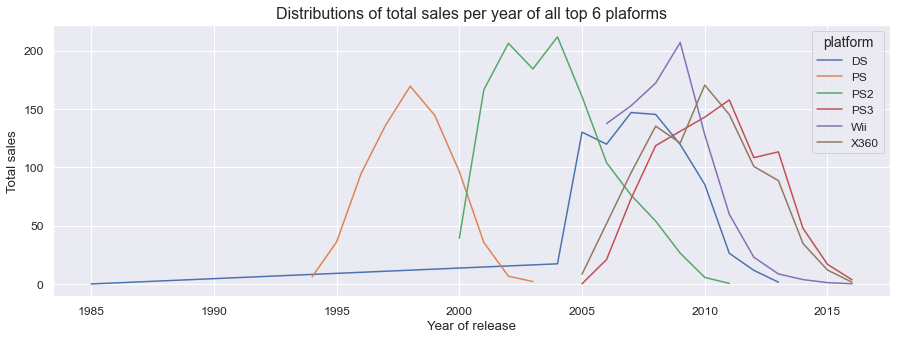

In [45]:
# building lineplot gathering all distributions of total sales per year of all top 6 plaforms
df_top_platforms_lifecircle = df_games.query('platform in @list_top_sales_platforms').groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(15,5))
ax = sns.lineplot(data=df_top_platforms_lifecircle, x='year_of_release', y='total_sales', hue='platform')
plt.title(f'Distributions of total sales per year of all top 6 plaforms', size =16)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.xlabel('Year of release')
plt.ylabel('Total sales');

- each of platforms had a clear picture of the life cycle reflected in sales, with periods of zero (or almost zero) sales, the peak of sales for some 2-4 years, and a further decline in sales.
- PS and PS2 platforms had their peaks of popularity and their decreases earlier than the other platforms.
- usually, the life cycle was about 8-12 years, but much longer in the case of DS platform, which had almost 20 years way from 0 revenues to earning over 20 mil. USD a year.
- while for the other 4 out of the top 6 platforms, the way to becoming popular (significant revenue growth) took about 2 years, WII platform started its way from a significant level of revenue from the first year (almost 150 mil. USD).

In [46]:
# let's look at modern time data - since the 2000 year
df_games_current=df_games[df_games.year_of_release>=2000]

In [47]:
# getting min and max years of releases of games by platforms
df_age_current=df_games_current.groupby(['platform'])['year_of_release'].agg(['min','max'])

In [48]:
# calculating platforms' age as different between max and min years of releases. We should note here that if we have the max year 2016 - we can't treat the platforms age as final
df_age_current['age']=df_age_current['max']-df_age_current['min']

#checking the result
df_age_current

,min,max,age
platform,,,
3DS,2010.0,2016.0,6.0
DC,2000.0,2008.0,8.0
DS,2004.0,2013.0,9.0
GB,2000.0,2001.0,1.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
N64,2000.0,2004.0,4.0
PC,2000.0,2016.0,16.0
PS,2000.0,2003.0,3.0


In [49]:
# calculating the median age of platform
platform_median_age = df_age_current['age'].median()

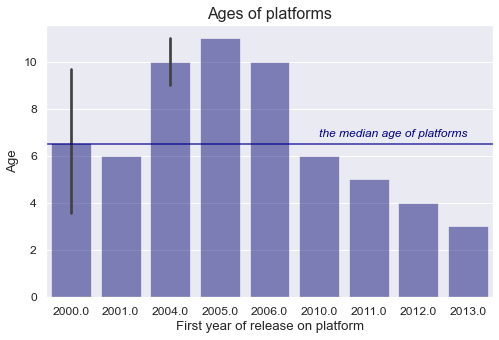

In [50]:
# let's build a barplot on ages of the platforms 
plt.figure(figsize=(8,5))
ax = sns.barplot(data=df_age_current, x='min', y='age', color='darkblue', alpha=0.5)
plt.axhline(y=platform_median_age, color='darkblue', alpha=0.8) # the median age of platforms
plt.text(x=5, y=platform_median_age+0.3, s='the median age of platforms', color='darkblue', style ='italic', size=12)
plt.title(f'Ages of platforms', size =16)
plt.xlabel('First year of release on platform')
plt.ylabel('Age');

- platforms with first releases in 2004-2006 years have the longest life circles
- it seems like there is a trend of shortening platforms' life circles since 2010 year, but we can't state it for sure as the ages of platforms with the max year of release in the 2016 year are not final. 

#### Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

#### Work only with the data that you've decided is relevant. Disregard the data for previous years.

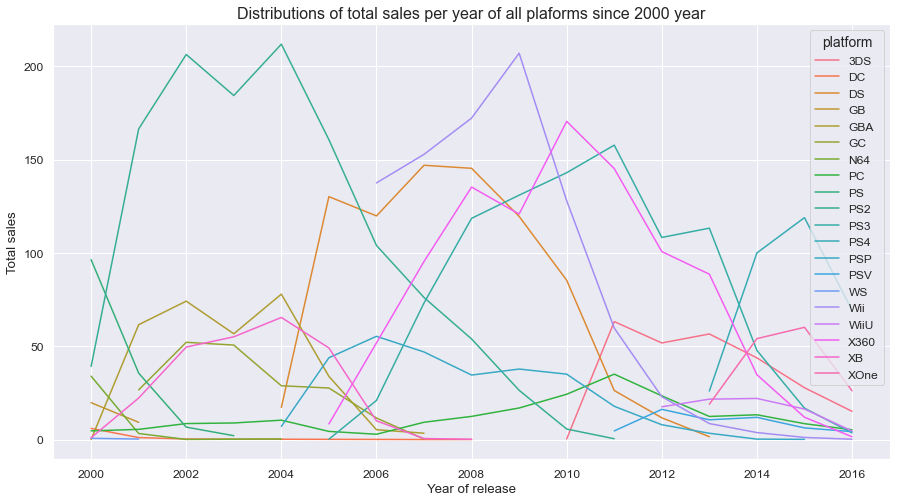

In [51]:
# let's visualize the distributions of total sales per year of all platforms since 2000 year
df_platform_lifecircle = df_games_current.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df_platform_lifecircle, x='year_of_release', y='total_sales', hue='platform')
plt.title(f'Distributions of total sales per year of all plaforms since 2000 year', size =16)
plt.setp(ax.get_legend().get_texts(), fontsize='12')
plt.setp(ax.get_legend().get_title(), fontsize='14') 
plt.xlabel('Year of release')
plt.ylabel('Total sales');

We see that in the 2012-2013 years many previously successful platforms were in decline, while some new ones started to bloom. As we need to make projections based on the perspective platforms, we will take 2012 year as our starting point for further analysis. We will also create the data slice of most actual data since 2015 year.

In [52]:
# creating the data frame with data since 2012 year
df_games_2012_2016 = df_games.query('year_of_release >= 2012')
df_games_2012_2016.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2895.000000,2895.000000,2895.000000,2895.000000,2895.000000,1318.000000,1536.000000,2895.000000
mean,2013.911226,0.204908,0.175717,0.066604,0.054131,72.270106,6.639909,0.501361
std,1.413259,0.565963,0.504637,0.241246,0.164406,12.661825,1.568385,1.247409
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.200000,0.010000
25%,2013.000000,0.000000,0.000000,0.000000,0.000000,66.000000,5.800000,0.040000
50%,2014.000000,0.030000,0.030000,0.010000,0.010000,74.000000,7.000000,0.120000
75%,2015.000000,0.170000,0.140000,0.050000,0.040000,81.000000,7.800000,0.430000
max,2016.000000,9.660000,9.090000,4.390000,3.960000,97.000000,9.300000,21.050000


In [53]:
# creating the data frame with data since 2015 year
df_games_2015_2016 = df_games.query('year_of_release >= 2015')
df_games_2015_2016.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,457.000000,559.000000,1108.000000
mean,2015.453069,0.136995,0.133520,0.048195,0.040424,73.015317,6.649016,0.359134
std,0.498017,0.402121,0.432158,0.167160,0.133290,12.077499,1.623769,0.943111
min,2015.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,67.000000,5.900000,0.030000
50%,2015.000000,0.010000,0.020000,0.010000,0.000000,74.000000,7.000000,0.080000
75%,2016.000000,0.090000,0.090000,0.040000,0.020000,81.000000,7.900000,0.260000
max,2016.000000,6.030000,6.120000,2.790000,2.380000,96.000000,9.300000,14.630000


#### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

To find out which platforms are leading in sales, we will examine data from two close time periods: 2012-2016 and 2015-2016. We keep in mind that the data from December 2016 may not be complete, and this can somehow affect the total picture, but this influence shouldn't be dramatic. 

In [54]:
# grouping data to display total sales of each platform by year of release
df_games_2012_2016_grouped = df_games.query('year_of_release >= 2012').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release', ascending=True).reset_index()
df_games_2015_2016_grouped = df_games.query('year_of_release >= 2015').groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release', ascending=True).reset_index()
df_games_2012_2016_grouped.head(10)
df_games_2015_2016_grouped.head(10)

,index,platform,year_of_release,total_sales
0,0,3DS,2012.0,51.76
1,30,Wii,2012.0,22.94
2,35,WiiU,2012.0,17.56
3,25,PSV,2012.0,16.19
4,21,PSP,2012.0,7.95
5,12,PS3,2012.0,108.28
6,7,PC,2012.0,23.44
7,40,X360,2012.0,100.72
8,5,DS,2012.0,11.67
9,8,PC,2013.0,12.38


,index,platform,year_of_release,total_sales
0,0,3DS,2015.0,27.78
1,15,X360,2015.0,11.96
2,13,WiiU,2015.0,16.35
3,11,Wii,2015.0,1.14
4,17,XOne,2015.0,60.14
5,8,PSP,2015.0,0.12
6,9,PSV,2015.0,6.25
7,4,PS3,2015.0,16.82
8,2,PC,2015.0,8.52
9,6,PS4,2015.0,118.90


In [55]:
# sorting platforms by total sales for further plotting 
order_2012_2016 = df_games.query('year_of_release >= 2012').groupby('platform')['total_sales'].sum().sort_values(ascending=False)
order_2015_2016 = df_games.query('year_of_release >= 2015').groupby('platform')['total_sales'].sum().sort_values(ascending=False)
order_2012_2016
order_2015_2016

platform
PS4     314.14
PS3     289.71
X360    237.52
3DS     195.01
XOne    159.32
WiiU     82.19
PC       62.87
PSV      49.18
Wii      36.60
DS       13.21
PSP      11.69
Name: total_sales, dtype: float64

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: total_sales, dtype: float64

In [56]:
order_2012_2016 = order_2012_2016.index.to_list()
order_2015_2016 = order_2015_2016.index.to_list()
order_2012_2016
order_2015_2016

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS', 'PSP']

['PS4', 'XOne', '3DS', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii', 'PSP']

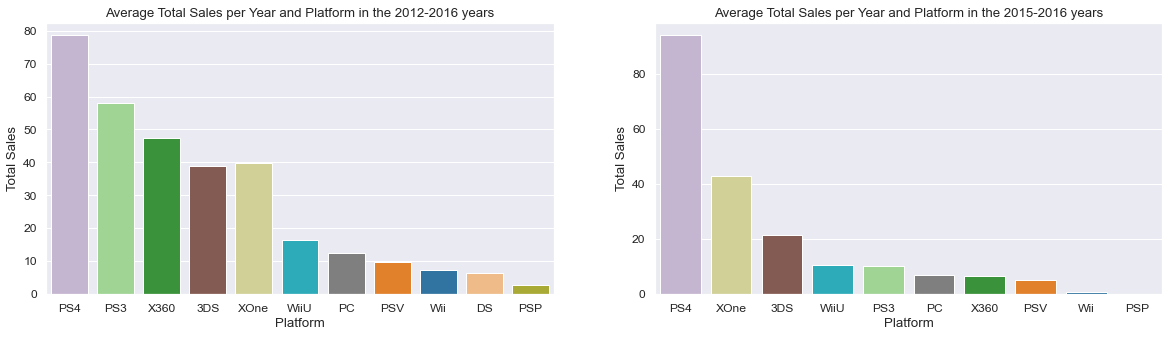

In [57]:
# building barplots to visualize total sales by platforms in two close time periods: 2012-2016 and 2015-2016
# using a two-column subplot to display two different chats next to each other

fig, axes = plt.subplots(1,2, figsize=(20, 5))

# Create a dictionary to pair each platform with its color
color_palette = {
    platform: color
    for platform, color in zip(
        df_games['platform'].unique(), sns.color_palette('tab20', n_colors=len(df_games['platform'].unique()))
    )
}

# Create a barplot for 2012-2016 years
sns.barplot(data = df_games_2012_2016_grouped, x='platform', y='total_sales', order=order_2012_2016, ci=None, ax=axes[0], palette=color_palette)\
                        .set(title='Average Total Sales per Year and Platform in the 2012-2016 years', xlabel='Platform', ylabel='Total Sales')

# Create a barplot for 2015-2016 years
sns.barplot(data = df_games_2015_2016_grouped, order=order_2015_2016, x='platform', y='total_sales', ci=None, ax=axes[1], palette=color_palette)\
                        .set(title='Average Total Sales per Year and Platform in the 2015-2016 years', xlabel='Platform', ylabel='Total Sales');


From the plots above we see the following:

- as of the 5-year period 2012-2016, the PS4, PS3, and X360 were the top sellers. They are closely followed by the 3DS and XOne platforms, staying in the top 5.

- as of the most recent period 2015-2016, PS3 and Х360 platforms had dramatically lost their positions, while sales of XOne platform otherwise had significantly grown up.  The 3DS platform decreased in sales but nevertheless entered the top three most profitable platforms. The leader remains the PS4 and its revenues continue to rise.

#### Which platforms are growing or shrinking, which are potentially profitable platforms? 

To answer those questions we are going to build a pivottable and heatmap. This heatmap will display year to year changes in total sales of each platfotm based on data since the 2012 year.

In [58]:
# building pivot table reflecting total sales of each platform by year of release
# we fill NaN values with zeros here, so we'll be able to proceed with mathematical operations with all the data
df_games_2012_2016_pivot = pd.pivot_table(df_games.query('year_of_release >= 2012'),index='year_of_release',\
                                           columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
df_games_2012_2016_pivot

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,51.76,11.67,23.44,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2013.0,56.57,1.54,12.38,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016.0,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [59]:
# by use of Pandas shift() method we shift our data by one row = one year
df_games_2012_2016_pivot.shift(+1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013.0,51.76,11.67,23.44,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2014.0,56.57,1.54,12.38,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2015.0,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2016.0,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


In [60]:
# checking one year difference in total sales
dynamics_per_year = df_games_2012_2016_pivot-df_games_2012_2016_pivot.shift(+1)
dynamics_per_year

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013.0,4.81,-10.13,-11.06,4.97,25.99,-4.57,-5.60,-14.35,4.09,-12.14,18.96
2014.0,-12.81,-1.54,0.90,-65.49,74.01,-3.14,1.31,-4.84,0.38,-53.84,35.11
2015.0,-15.98,0.00,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016.0,-12.64,0.00,-3.27,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


In [61]:
# let's transponse the data in order to see years as column names
dynamics_per_year = dynamics_per_year.T
dynamics_per_year

year_of_release,2012.0,2013.0,2014.0,2015.0,2016.0
platform,,,,,
3DS,NaN,4.81,-12.81,-15.98,-12.64
DS,NaN,-10.13,-1.54,0.00,0.00
PC,NaN,-11.06,0.90,-4.76,-3.27
PS3,NaN,4.97,-65.49,-30.94,-13.22
PS4,NaN,25.99,74.01,18.90,-49.65
PSP,NaN,-4.57,-3.14,-0.12,-0.12
PSV,NaN,-5.60,1.31,-5.65,-2.00
Wii,NaN,-14.35,-4.84,-2.61,-0.96
WiiU,NaN,4.09,0.38,-5.68,-11.75


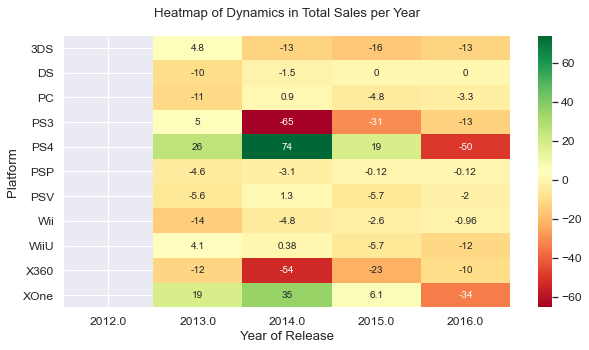

In [62]:
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(dynamics_per_year, cmap='RdYlGn', annot=True)
heatmap.set_title('Heatmap of Dynamics in Total Sales per Year', y=1.05)
heatmap.set_xlabel('Year of Release')
heatmap.set_ylabel('Platform');

- this heat map displays changes in total sales between given and previous years.

- zeros here mean either platforms that are not yet in service or those who are already buried.

- we are interested here in platforms having any values in the last 2016 year - they are active. As the December 2016 data is probably incomplete, negative values for this year may change to positive ones when all the data is gathered for this year. But we can't be sure in this regard, so it's probably important to take into account the exact figures of 2015 (showing the difference between sales in 2015 and 2014 years).

- **overall, PS4, XOne and 3DS platforms seem to have the highest amounts of sales** (we saw that in the bar plots above), but it seems their peaks of popularities have already passed. **It is difficult to say whether they will be able to maintain their leadership**. Anyway these platforms are worthy of close attention.

- **Wii and PSP platforms are not on the leaders list yet, but they are steadily growing year by year, so we must mention them as the platforms with the highest potential.**

- **WiiU and PS3 sales are rapidly declining**. 

- the other platforms like PSV are not consistent in their sales so it's difficult to make any predictions about them.

Obviously, we have to take into account other parameters as well if we want our conclusions to be more accurate. All the conclusions are based on the data we've gathered in this study.

#### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various -platforms? Describe your findings.

We are planning to build boxplots for our analysis and use them repeatedly in a common way. So creating a function seems to be a reasonable idea for this purpose (we will use the developments from the previous project, and it wouldn't be a big deal to adjust it for our current purposes). 

In [63]:
# building a function for creating boxplots

def boxplots(df, category, x_parameter, y_parameter, figsize=(15,5), comments='', order=True, notch=False, show_outliers=True):
    
    """ 
    The function builds boxplots for each unique value of a selected category (if any is defined) of a given dataframe.
    For easier boxplots comparison when running the function multiple times, colors are set based on unique values of 'x_parameter'.
    
    As input this function takes:
     - dataframe
     - category - whether to build a separate boxplot for each name in a defined category, 
     if yes - the value must be the name of a category, otherwise its value must be "None"
     - x axis parameter
     - y axis parameter
     - figsize - a size of boxplot
     - order parameter: if its value is "True" - the boxplots are sorted by boxplots' medians in ascending order, 
     if its value is "False" or "None" - in default order     
     - notch parameter -  whether to show notches on boxplots (for more evident medians indication)
     - show_outliers parameter - whether to show outliers
    
    As output the function presents:      
     - boxplots for each unique value of a selected category of a dataframe. 
     If no category was mentioned (category=None), there would be built only one chart        
    """    
                
    # Create a dictionary to pair each x-axis parameter with its color
    color_palette = {
        platform: color
        for platform, color in zip(            
            df_games[x_parameter].unique(), sns.color_palette('tab20', n_colors=len(df_games[x_parameter].unique()))
        )
    }  
    
    # editing for comments
    if comments != '':
        comments=', '+comments      
     
    if category==None:        
        # checking conditions for sorting boxplots by their medians values
        if order==True:
            boxplot_order = df.groupby(x_parameter)[y_parameter].median().sort_values(ascending=False).index            
        else:    
            boxplot_order=None         
        
        # ploting boxplot with relevant subtitles
        fig, ax = plt.subplots(figsize=figsize)
        plt.suptitle(f'Boxplot of {y_parameter} by {x_parameter}{comments}', fontsize=16)
        sns.boxplot(x=df[x_parameter], y=df[y_parameter],\
            boxprops=dict(alpha=0.5), order=boxplot_order, 
            notch=notch, showfliers=show_outliers, palette=color_palette)

    else:          
        # preventing data overwriting while running the "for" circle
        df_basic = df  

        # going through all unique names of a selected category, the further code would be applied to each of them       
        for unique_name in df[category].unique(): 

            # assigning data the boxplots will be built on
            df = df_basic[df_basic[category]==unique_name]  
            
            # checking conditions for sorting boxplots by their medians values
            if order==True:
                boxplot_order = df.groupby(x_parameter)[y_parameter].median().sort_values(ascending=False).index
            else:    
                boxplot_order=None

            # ploting boxplot with relevant subtitles                   
            fig, ax = plt.subplots(figsize=figsize)
            plt.suptitle(f'Boxplot of {y_parameter} by {x_parameter} for the {unique_name} {category}{comments}', fontsize=16)
            sns.boxplot(x=df[x_parameter], y=df[y_parameter],\
                boxprops=dict(alpha=0.5), order=boxplot_order, 
                notch=notch, showfliers=show_outliers, palette=color_palette)

Let's built boxplots of total sales by platforms for the three periods: all the time (37 years in total), since 2012 year (5 years in total)and since 2016 year (2 years in total). We will sort them according to their medians values of total sales of games.

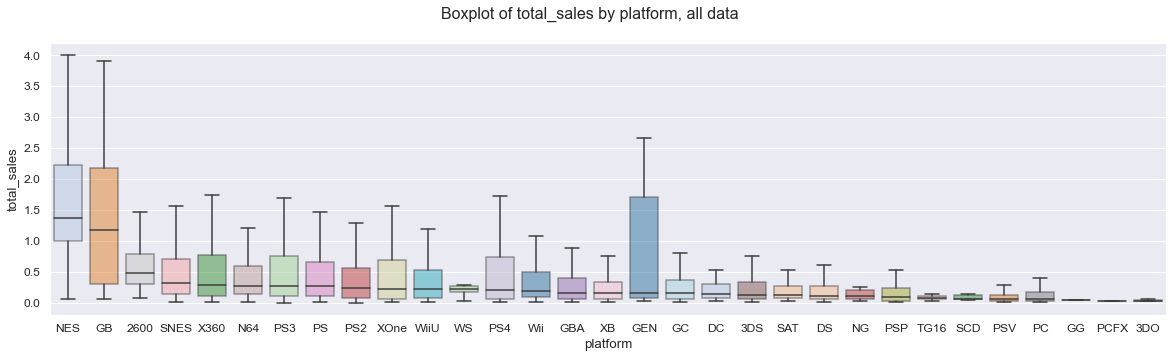

In [64]:
# boxplots of total sales by platform - all data
boxplots(df=df_games, category=None, x_parameter='platform', y_parameter='total_sales', \
         comments='all data', figsize=(20,5), order=True, notch=False, show_outliers=False)

Outliers on boxplots make the picture "unreadable" so we will study the data without them.

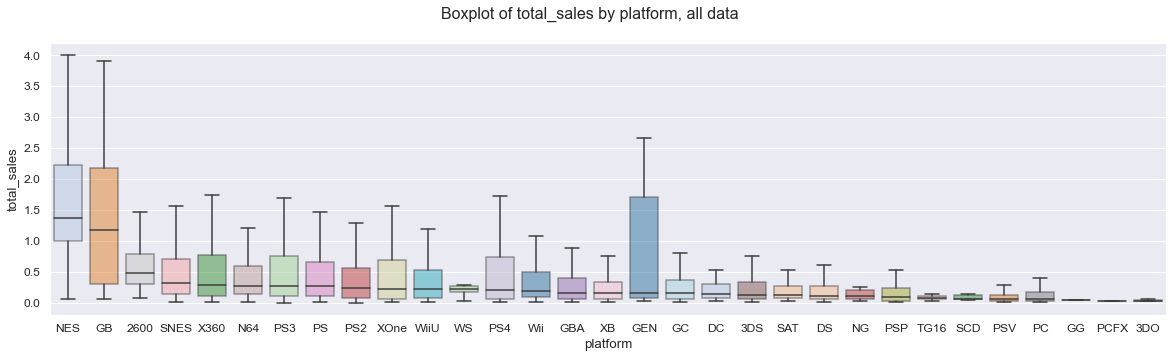

In [65]:
# boxplots of total sales by platform - all data, without outliers
boxplots(df=df_games, category=None, x_parameter='platform', y_parameter='total_sales', \
         comments='all data', figsize=(20,5), order=True, notch=False, show_outliers=False)

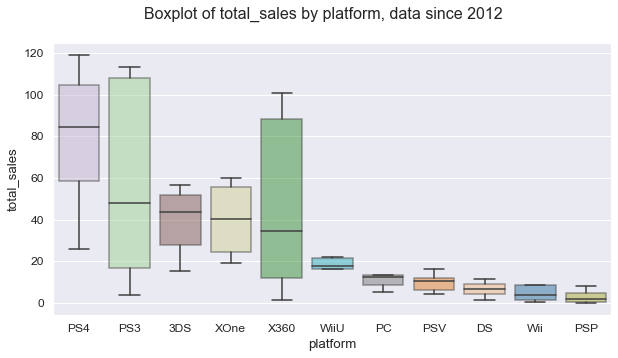

In [66]:
# boxplots of total sales by platform - data since 2012
boxplots(df=df_games_2012_2016_grouped, category=None, x_parameter='platform', y_parameter='total_sales', \
         comments='data since 2012', figsize=(10,5), order=True, notch=False, show_outliers=False)

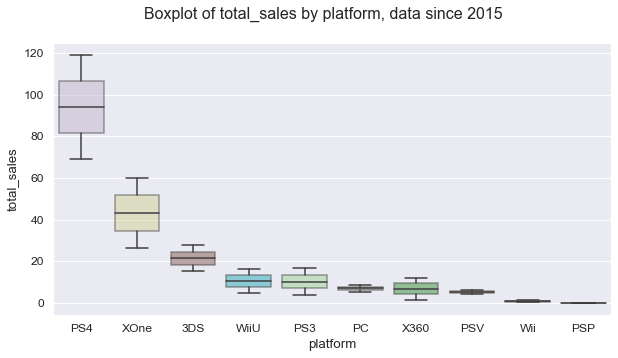

In [67]:
# boxplots of total sales by platform - data since 2015
boxplots(df=df_games_2015_2016_grouped, category=None, x_parameter='platform', y_parameter='total_sales', \
         comments='data since 2015', figsize=(10,5), order=True, notch=False, show_outliers=False)

- just let's recall that boxplots visualise sales distributions of games and are sorted according to medians of total sales.

- **sales differences are very significant in the given time periods**.

- **having high total sales in general does not imply having high average revenues from each game, and vice versa**. On the data since 2015, we can see that the absolute leader of total revenues - PS4 platform - is only fourth in middle revenue from each of the game indexes. 

- we can hypothesize that **the leadership in total sales of PS4 was driven by a very vast range of games sold on this platform** - far away from its competitors. According to this logic, **the platform that has been a leader in median revenue from games since 2015 - the WiiU platform - must have relatively few games** since it does not rank among the top of total sales competition. The next step is to check this hypothesis.

In [68]:
# number of games by platform, data since 2015
df_games.query('year_of_release >=2015').groupby('platform')['platform'].count().sort_values(ascending=False)

platform
PS4     301
PSV     195
XOne    167
3DS     132
PS3     111
PC      104
X360     48
WiiU     42
Wii       5
PSP       3
Name: platform, dtype: int64

To study average sales on various platforms we will first define the most popular (frequently appearing) games, then check their sales on different platforms.

In [69]:
# top 3 most frequent games
most_frequent_games = df_games.groupby('name')['name'].count().sort_values(ascending=False).head(3)
most_frequent_games

name
Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
Name: name, dtype: int64

In [70]:
# creating a list of top 3 most frequent games
most_frequent_games = most_frequent_games.index.to_list()
most_frequent_games

['Need for Speed: Most Wanted', 'FIFA 14', 'Ratatouille']

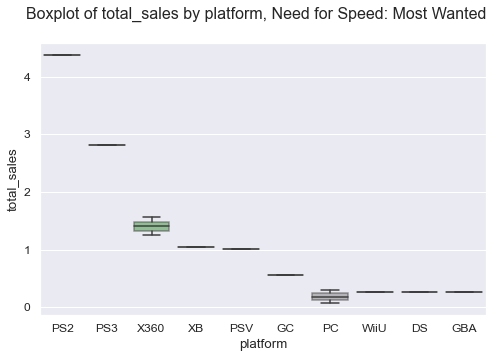

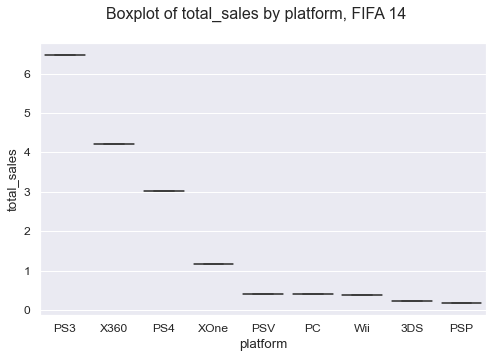

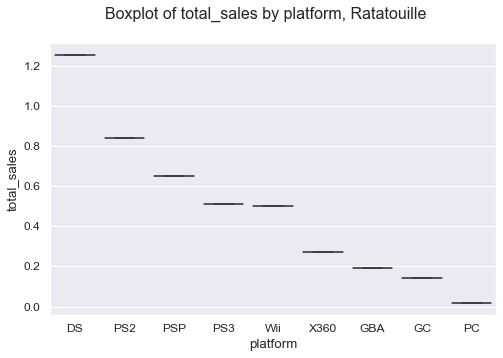

In [71]:
# boxplots of total sales by platforms of top 3 most frequent games

for game in most_frequent_games:
    boxplots(df=df_games.query('name == @game'), category=None, x_parameter='platform', y_parameter='total_sales', \
         comments=game, figsize=(8,5), order=False, notch=False, show_outliers=False)

- differences in average revenues from each given game on various platforms are visible to the naked eye. 
- the average revenues can differ many times for one game on different platforms, e.g. sales of 'Need for Speed: Most Wanted' on PS2 are approximately 4.5 times higher than on XB.
- one platform can be a driver of revenues from one game (e.g. Ratatouille) while being an outsider for another game sales ('Need for Speed: Most Wanted') 

#### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

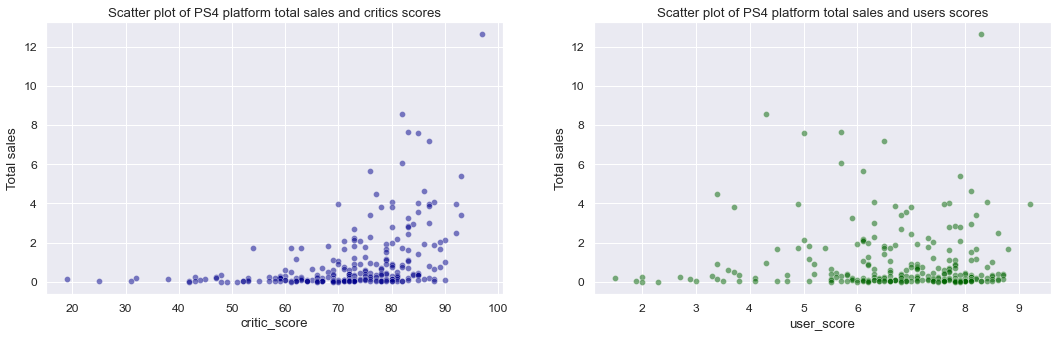

In [72]:
# building barplots to visualize total sales by platforms in two close time periods: 2012-2016 and 2015-2016

# using a two-column subplot to display two different chats next to each other
fig, axes = plt.subplots(1,2, figsize=(18, 5))

platform = "PS4"

# Create a scatterplot for PS4 platform total sales and critics scores
sns.scatterplot(data = df_games_2012_2016.query('platform=="PS4"'), x='critic_score', y='total_sales', color='darkblue', alpha=0.5, ax=axes[0])\
                        .set(title='Scatter plot of PS4 platform total sales and critics scores', ylabel='Total sales')

# Create a scatterplot for PS4 platform total sales and users scores
sns.scatterplot(data = df_games_2012_2016.query('platform=="PS4"'), x='user_score', y='total_sales', color='darkgreen', alpha=0.5, ax=axes[1])\
                        .set(title='Scatter plot of PS4 platform total sales and users scores', ylabel='Total sales');

In [73]:
# checking correlation between total sales and critic score parameters for PS4 platform
df_games_2012_2016.query('platform=="PS4"')[['total_sales','critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.406568
critic_score,0.406568,1.000000


In [74]:
# checking correlation between total sales and user score parameters for PS4 platform
df_games_2012_2016.query('platform=="PS4"')[['total_sales','user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.031957
user_score,-0.031957,1.000000


Let's check whether the correlations remain the same when studying all the platforms.

In [75]:
# checking correlation between total sales and critic score parameters of all the platforms
df_games[['total_sales','critic_score']].corr()

,total_sales,critic_score
total_sales,1.000000,0.245146
critic_score,0.245146,1.000000


In [76]:
# checking correlation between total sales and user score parameters of all the platforms
df_games[['total_sales','user_score']].corr()

,total_sales,user_score
total_sales,1.000000,0.088132
user_score,0.088132,1.000000


- both the scatterplots and correlation matrices for the chosen PS4 platform reveal a moderate positive correlation between total sales and the critic score parameter, with correlation value - 0.4. However, there is almost zero correlation between total sales and the user score parameter.

- in case of studying all the platforms we see a weak positive correlation between total sales and the critic score parameter, with correlation value - 0.25. And still almost zero correlation between total sales and the user score parameter.

#### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

As we revealed above when plotting boxplots - average revenues can differ many times for one game on different platforms, e.g. sales of 'Need for Speed: Most Wanted' on PS2 are approximately 4.5 times higher than on XB.

#### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [77]:
# checking total sales by genre
df_sales_by_genre = df_games_2012_2016.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
df_sales_by_genre

genre
Action          445.78
Shooter         304.74
Role-Playing    192.80
Sports          181.07
Misc             85.28
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64

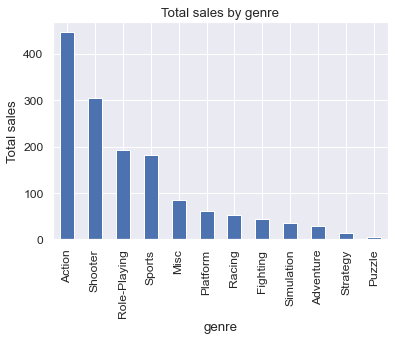

In [78]:
# let's plot a barpot of total sales by genre
df_sales_by_genre.plot(kind='bar')
plt.title('Total sales by genre')
plt.ylabel('Total sales')
df_sales_by_genre;

In [79]:
# list of top 3 genres
df_sales_by_genre.head(5).index.to_list()

['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc']

There are 4 leading in sales ganres: 'Action', 'Shooter', 'Role-Playing', 'Sports'. They all except 'Role-Playing' represent active style of playing.

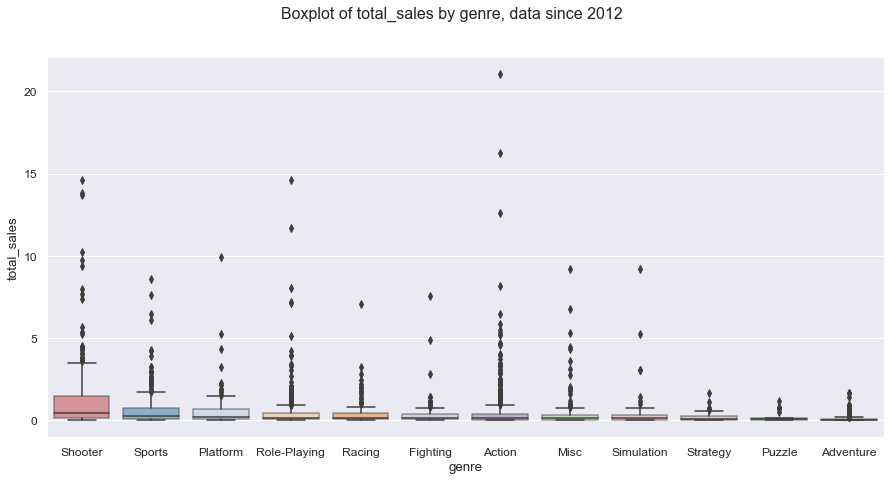

In [80]:
# boxplots of total sales of games by genres, data since 2012, values sorted by median values
boxplots(df=df_games_2012_2016, category=None, x_parameter='genre', y_parameter='total_sales', \
         comments='data since 2012', figsize=(15,7), order=True, notch=False, show_outliers=True)

- according to median values 'Shooter' is still on the top, 'Role-Playing' still stays in the top 4.
- despite being the most popular genre by total sales, the action genre falls at the bottom of the list sorted by average game revenues.While some games are the best sellers according to the outliers shown on the "Action" boxplot.
- 'Platform' genre breaks into the top 3 list.

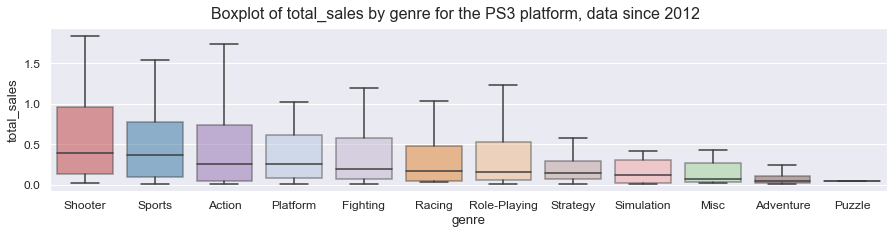

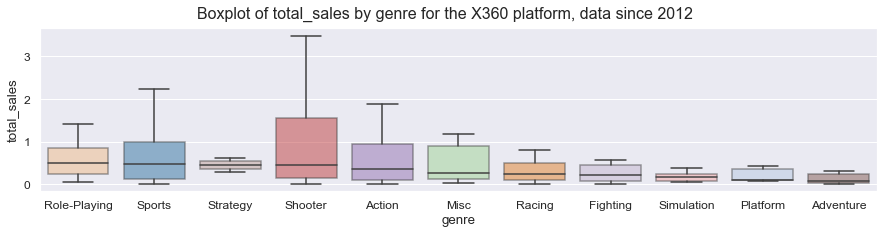

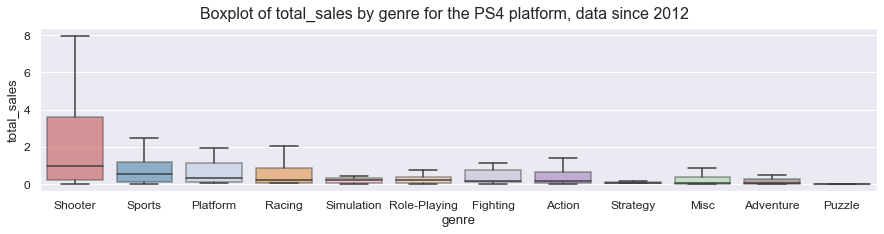

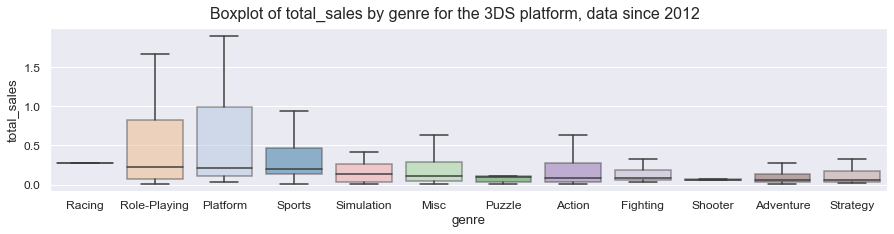

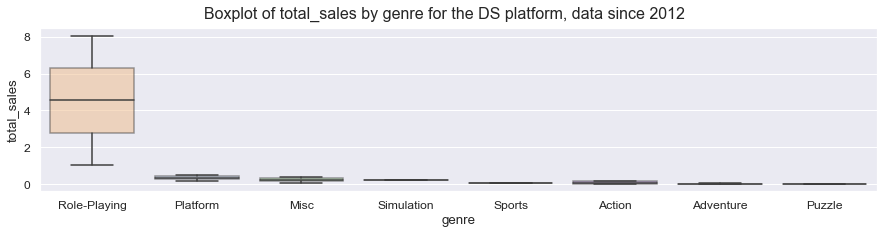

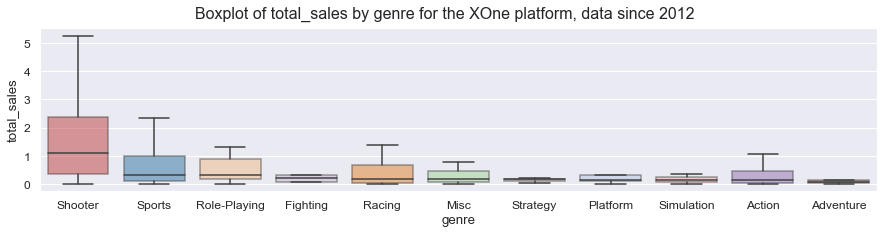

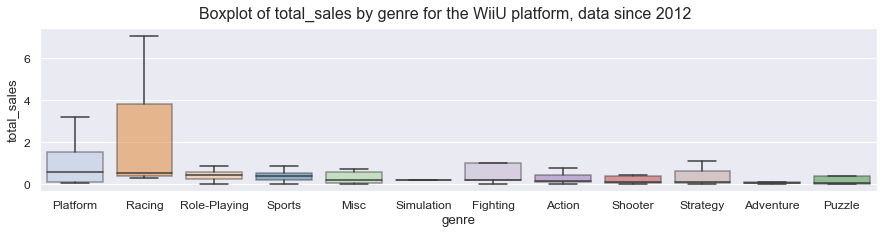

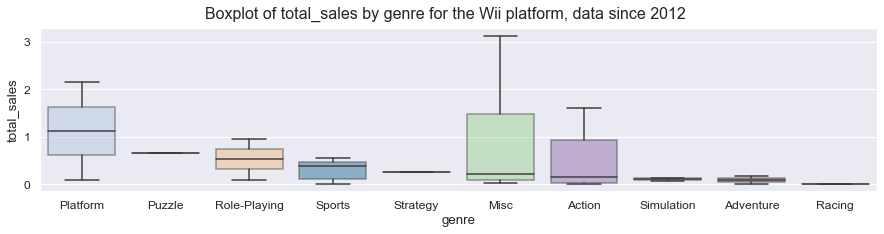

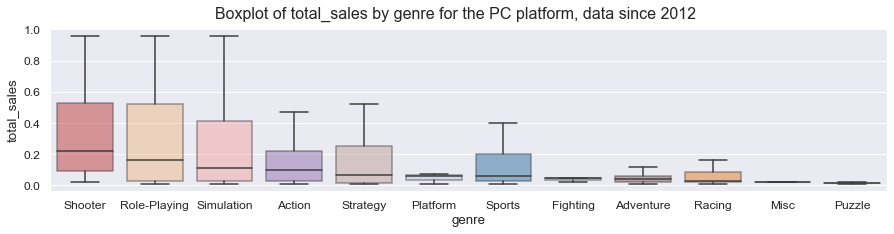

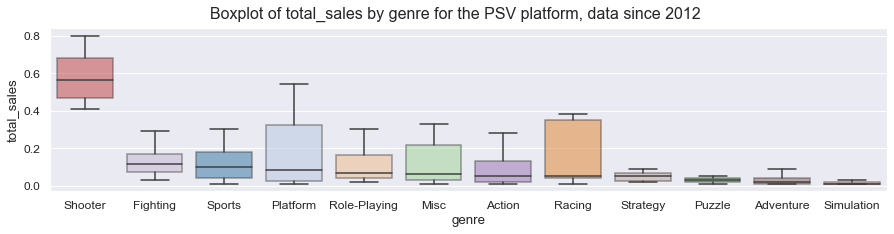

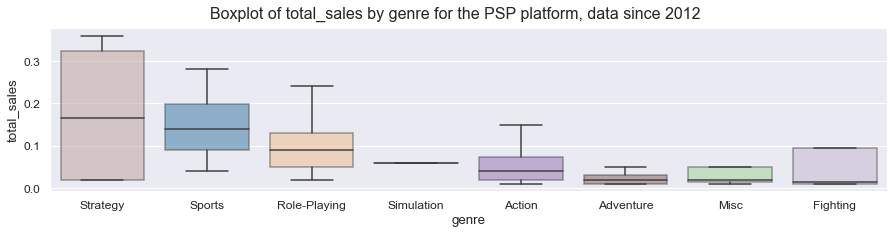

In [81]:
# let's also check whether average sales per genre depend on the platform
# boxplots of total sales of games by genres and platforms - data since 2012, values sorted by median values
boxplots(df=df_games_2012_2016, category='platform', x_parameter='genre', y_parameter='total_sales', \
         comments='data since 2012', figsize=(15,3), order=True, notch=False, show_outliers=False)

- Yes indeed, average sales per genre depend on the platform! On the PS4 platform, the 'Shooter' genre has the highest median price, while the 'Role-Playing' genre dominates on the DS platform, and the 'Shooter' genre dominates on the PSV platform.

## 4. Create a user profile for each region

Let's outline the questions we are going to answer in this part of the project, they are following:

For each region (NA, EU, JP), determine:
- The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

In [82]:
# creating a list of regions
regions = ['na_sales','eu_sales','jp_sales']

The top 5 platforms, na_sales


,platform,na_sales
9,X360,140.57
4,PS4,108.74
3,PS3,103.74
10,XOne,93.12
0,3DS,55.49


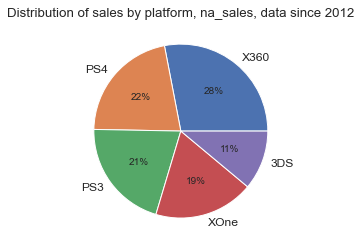



The top 5 platforms, eu_sales


,platform,eu_sales
4,PS4,141.09
3,PS3,107.27
9,X360,74.89
10,XOne,51.59
0,3DS,42.83


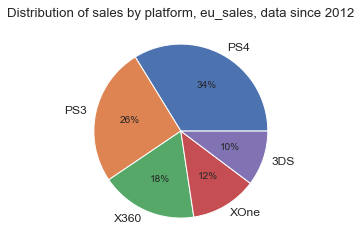



The top 5 platforms, jp_sales


,platform,jp_sales
0,3DS,87.79
3,PS3,35.29
6,PSV,21.04
4,PS4,15.96
8,WiiU,13.01


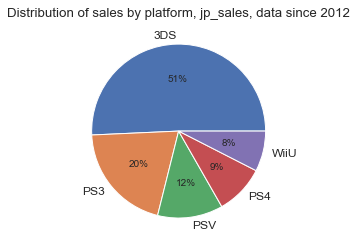

In [83]:
# revealing top platforms in regions we study, here we will look at data since 2012
for region in regions:
    print('The top 5 platforms,', region)
    df_games_2012_2016_by_platform = df_games_2012_2016.groupby(['platform'])[region].sum().reset_index().sort_values(by=region,ascending=False).head()
    df_games_2012_2016_by_platform    
    _ =plt.pie(data=df_games_2012_2016_by_platform, x=region, labels = 'platform', autopct='%.0f%%')    
    _ =plt.title(f'Distribution of sales by platform, {region}, data since 2012' )    
    plt.show();
    print('\n')  

- the PS3 platform is in the top 3 across all regions.
- PS4 and X360 are in the top 3 in NA and EU, but not in Japan, where the leaders are 3DS and PS3 platforms. 

The top 5 genres, na_sales


,genre,na_sales
0,Action,180.07
8,Shooter,144.78
10,Sports,81.53
7,Role-Playing,64.00
3,Misc,38.19


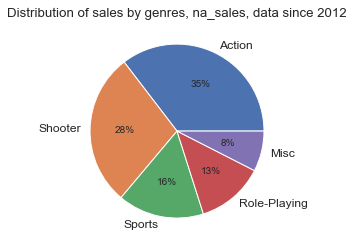



The top 5 genres, eu_sales


,genre,eu_sales
0,Action,161.22
8,Shooter,113.47
10,Sports,69.09
7,Role-Playing,48.53
6,Racing,27.29


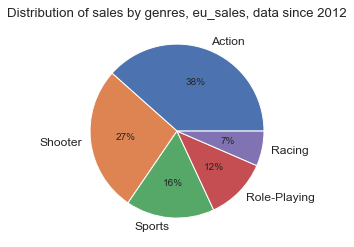



The top 5 genres, jp_sales


,genre,jp_sales
7,Role-Playing,65.44
0,Action,52.80
3,Misc,13.10
9,Simulation,10.41
2,Fighting,9.44


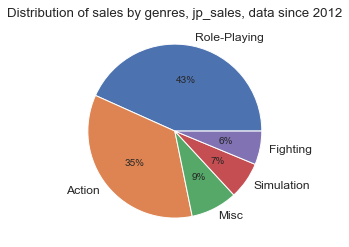

In [84]:
# revealing top genres in regions we study
for region in regions:
    print('The top 5 genres,', region)
    df_games_2012_2016_by_genre = df_games_2012_2016.groupby(['genre'])[region].sum().reset_index().sort_values(by=region,ascending=False).head()
    df_games_2012_2016_by_genre    
    _ =plt.pie(data=df_games_2012_2016_by_genre, x=region, labels = 'genre', autopct='%.0f%%')    
    _ =plt.title(f'Distribution of sales by genres, {region}, data since 2012' )    
    plt.show();
    print('\n')      

- the Action genre is in the top 3 across all regions.
- although the Shooter genre holds top positions in NA and EU, it does not in Japan, where Role-Playing is the leader and Shooter did not even make the top 5.

The top 5 rating, na_sales


,rating,na_sales
2,M,231.58
0,E,114.37
4,unknown,103.31
1,E10+,77.93
3,T,66.02


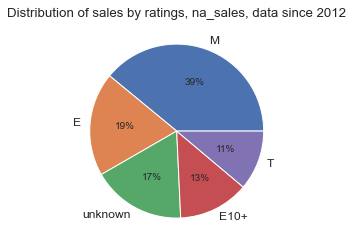



The top 5 rating, eu_sales


,rating,eu_sales
2,M,193.96
0,E,113.03
4,unknown,91.50
1,E10+,57.25
3,T,52.96


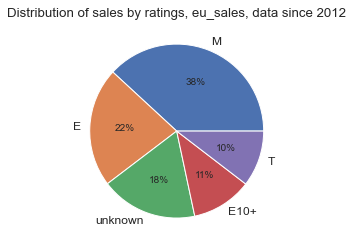



The top 5 rating, jp_sales


,rating,jp_sales
4,unknown,109.08
0,E,28.33
3,T,26.02
2,M,21.20
1,E10+,8.19


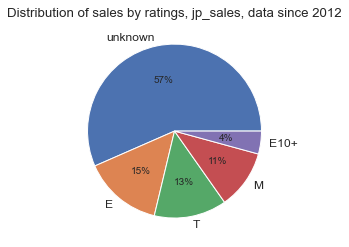

In [85]:
# displaying a data frame on ratings and plotting a pie chart for each region
for region in regions:
    print('The top 5 rating,', region)
    df_games_2012_2016_by_rating = df_games_2012_2016.groupby(['rating'])[region].sum().reset_index().sort_values(by=region,ascending=False).head()
    df_games_2012_2016_by_rating
    _ =plt.pie(data=df_games_2012_2016_by_rating, x=region, labels = 'rating', autopct='%.0f%%')    
    _ =plt.title(f'Distribution of sales by ratings, {region}, data since 2012' )     
    plt.show();
    print('\n')    

Fast googling gives us the keys for deciphering abbreviations. They are the following:
- «EC» («Early childhood») 
- «E» («Everyone»)
- «E10+» («Everyone 10 and older») 
- «T» («Teen»)
- «M» («Mature») 
- «AO» («Adults Only 18+»)
- «RP» («Rating Pending») 

- games having «M» («Mature») rating are on the top en NA and EU regions. Games having «E» («Everyone») rating are on the second place there. 

- we won't pay attention to "unknown" values, as it's impossible to guess correctly what they stand for. It is worth mentioning that the share of games with an unknown rating is the highest in Japan - it's many times higher than the nearest other rating.

## 5. Test statistical hypotheses

Let's outline the questions we are going to answer in this part of the project, they are following:
- Average user ratings of the Xbox One and PC platforms are the same.
- Average user ratings for the Action and Sports genres are different.

In [86]:
# Since we deal with comparing means of distributions, the ttest_ind method from the Scipy library would be appropriate for this purpose.
# As we need to test several hypotheses with a similar approach we will build a function for this purpose.

def ttest_ind_plus (df,  filter_field, filter_value_1, filter_value_2, study_field, alpha=0.05):
  
    """  
    The function runs ttest_ind method from the Scipy library, compares descriptive statistics and builds histplots of data we study.
    
    As input this function takes:
     - df - the data frame we study
     - filter_field - field we apply a filter on
     - filter_value_1 - the first value of the filter
     - filter_value_2 - the second value of the filter
     - study_field - the field we study
     - alpha -critical statistical significance level (by default we use classical critical statistical significance level value -0.05 
              and if the p-value is less than alpha, we will reject the hypothesis    
    """ 

    df_1 = df[df[filter_field] == filter_value_1][study_field].dropna()
    df_2 = df[df[filter_field] == filter_value_2][study_field].dropna()
    
    results = st.ttest_ind(df_1, df_2, equal_var = False)

    # seting color for print
    def color_print(text, color):
        print(f"\033[{color}m{text}\033[0m")

    # printing results
    print('p-value: ', results.pvalue)

    if results.pvalue < alpha:
        color_print('We reject the null hypothesis', '1;31')  # red color
    else:
        color_print('We can\'t reject the null hypothesis', '1;32')  # green color        
    print('-'*35,'\n')    
    
    # Descriptive statistics        
    print(f'\'{filter_value_1}\' {filter_field} \'{study_field}\' Mean: {round(df_1.mean(),1)}')
    print(f'\'{filter_value_2}\' {filter_field} \'{study_field}\' Mean: {round(df_2.mean(),1)}')
    print(f'The difference between Means: {abs(round((df_1.mean()-df_2.mean())/df_2.mean()*100,1))} %\n')
    
    print(f'\'{filter_value_1}\' {filter_field} \'{study_field}\' Variance: {round(np.var(df_1),2)}')
    print(f'\'{filter_value_2}\' {filter_field} \'{study_field}\' Variance: {round(np.var(df_2),2)}\n')
    print(f'\'{filter_value_1}\' {filter_field} \'{study_field}\' Standard Deviation: {round(np.sqrt(np.var(df_1)),1)}')
    print(f'\'{filter_value_2}\' {filter_field} \'{study_field}\' Standard Deviation: {round(np.sqrt(np.var(df_2)),1)}\n')

    # Collective histogram 
    sns.histplot(df_1, kde=True, stat='density', color='green', label=filter_value_1, alpha=0.5, bins=10)
    sns.histplot(df_2, kde=True, stat='density', color='blue', label=filter_value_2, alpha=0.5,  bins=10)    
    plt.xlabel(study_field)
    plt.ylabel('Distribution Density')
    plt.title(f'Collective Histogram of \'{study_field}\' by \'{filter_value_1}\' and \'{filter_value_2}\' {filter_field}')
    plt.legend(title=filter_field);    

Let's test **the hypothesis that average user ratings of the Xbox One and PC platforms are the same.**

Let's formulate the null hypothesis as: average user ratings of the Xbox One and PC platforms are the same.
Than the alternative hypothesis would be: the average user ratings of the Xbox One and PC platforms are **not** the same.

p-value:  4.442408410019388e-06
We reject the null hypothesis
----------------------------------- 

'XOne' platform 'user_score' Mean: 6.5
'PC' platform 'user_score' Mean: 7.1
The difference between Means: 7.7 %

'XOne' platform 'user_score' Variance: 1.9
'PC' platform 'user_score' Variance: 2.34

'XOne' platform 'user_score' Standard Deviation: 1.4
'PC' platform 'user_score' Standard Deviation: 1.5



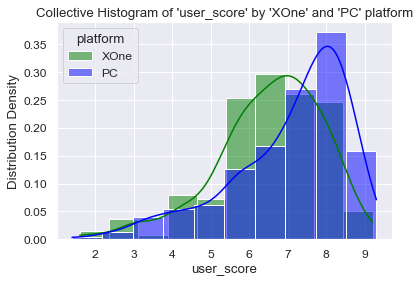

In [87]:
# running the 'ttest_ind_plus' function
ttest_ind_plus(df=df_games, filter_field='platform', filter_value_1='XOne', filter_value_2='PC', study_field='user_score', alpha=0.05)

Since the p-value is lower than alpha of 0.05, we can conclude that average user ratings of the Xbox One and PC platforms are different. Thus we reject the null hypothesis, and say that the alternative hypothesis is true - the average user ratings of the Xbox One and PC platforms are **not** the same. This conclusion corresponds with our previous analysis.

The second hypothesis we must check says that **average user ratings for the Action and Sports genres are different.**

Let's formulate the null hypothesis as: average user ratings for the Action and Sports genres are the same.
Than the alternative hypothesis would be: average user ratings for the Action and Sports genres are **not** the same.
These results are supported by the distribution histograms displayed above and the significant difference in mean values of the Action and Sport genres. There is a difference of 7.7% between them. 

p-value:  0.07807497359722629
We can't reject the null hypothesis
----------------------------------- 

'Action' genre 'user_score' Mean: 7.1
'Sports' genre 'user_score' Mean: 7.0
The difference between Means: 1.5 %

'Action' genre 'user_score' Variance: 2.03
'Sports' genre 'user_score' Variance: 2.62

'Action' genre 'user_score' Standard Deviation: 1.4
'Sports' genre 'user_score' Standard Deviation: 1.6



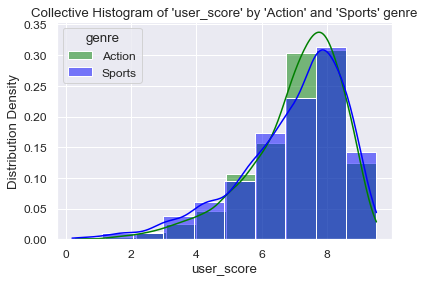

In [88]:
# running the 'ttest_ind_plus' function
ttest_ind_plus(df=df_games, filter_field='genre', filter_value_1='Action', filter_value_2='Sports', study_field='user_score', alpha=0.05)

As the p-value is higher than the alpha of 0.05, **we cannot reject the null hypothesis**. These results are supported by the distribution histograms displayed above and the very close mean values of the Action and Sport genres. There is a difference of just 1.5% between them. 

## 6. General Conclusion

### Data Preprocessing and Enrichment

We addressed several issues:

- Adjusted data types as needed.  
- Investigated fields with high percentages of missing values like 'critic_score', 'rating', and 'user_score'. Since these scores and ratings are crucial, we decided against replacing them with arbitrary values, just changed the missing values in the rating field into 'unknown'.   
- Dealt with missing values in 'year_of_release' - about 1.6% of the data. We filled in where possible and dropped the rest.  
- Handled missing values in the 'name' and 'genre' fields by dropping the corresponding rows.  
- Replaced 'tbd' values in the 'user_score' field with np.nan, treating them as missing values.  
- Checked for and removed duplicate entries.  
- Added a new column for total sales to enrich the dataset.

### Data Analysis

We performed various analyses to study the gaming industry:

#### Studying the Entire Dataset
   
- The data quality is poor in earlier years, improving after 1995-1997.     
- The game industry experienced a boom since 2001, peaking around 2008-2009, with a slight decline after 2011.      
- PS2 and DS were the top platforms, generating over 25% of all entries.        
- PS2 led in both popularity and revenue, with DS following closely behind.     
- Platforms varied in popularity and revenue over their lifespans, with PS and PS2 declining earlier than others.      
- The lifecycle of platforms ranged from 8-12 years, with DS having a longer lifespan.
- Platforms released in 2004-2006 had longer lifecycles.
    
#### Studying Recent Data

In 2012-2013, some once-popular platforms declined while new ones emerged. To project future trends, we focused on data from 2012 and analyzed recent trends from 2015.   
   
- PS4, PS3, and X360 were top sellers during 2012-2016, with 3DS and XOne following.    
- In the most recent period (2015-2016), PS3 and X360 sales declined, while XOne and 3DS remained strong.    
- PS4 maintained its lead in revenue growth.    
- PS4, XOne, and 3DS had high sales but declining popularity, with Wii and PSP showing potential.    
- WiiU and PS3 sales declined rapidly.    
- Sales and preferences varied significantly by region and platform.    
- Average sales per genre depended on the platform.    
- Critic scores correlated moderately with total sales, while user scores had almost no correlation.    
- Action games were popular across regions, with Shooter games leading in NA and EU.    
- Mature-rated games dominated in NA and EU, while Japan had a higher proportion of games with unknown ratings.

### Hypothesis Testing

Hypothesis testing using ttest_ind revealed:  

- Significant differences in average user ratings between Xbox One and PC platforms - users rate games differently on those platforms.    
- Similar average user ratings for Action and Sports genres.

### Summary and Recommendations

**Recall the Project's Main Goal**: to assist in making the right decision about which platform, market, and audience to focus attention on (allocate an appropriate advertising budget and plan advertising campaigns).

Our study provides the following insights:

- PS4, XOne, and 3DS platforms used to have the highest amounts of sales, but their leadership seems to be in decline. Nonetheless, they are worth attention.    
- Wii and PSP platforms are not on the leaders list yet, but they are steadily growing year by year, so they may have the highest potential.    
- Sales in North America and the European Union bring more money than Japan and provide clearer insights into top-rated games.    
- The genres Action, Sport, and Shooter used to bring the most money, so focusing on those (while keeping up with new trends) is recommended.    
- Consider regional popularity for advertising strategies.
      
Since the conclusions are solely based on the data gathered in this study, we obviously must take into account other parameters as well if we want our conclusions to be more accurate.
    
